####  Importing necessary libraries

In [1]:
import netCDF4 
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.image as mgimg
from matplotlib import animation
import glob
import os
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\bantwale.enyew\\python_netcdf\\mvnest_oro'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '20200825.180000.fv_core.res.nc',
 '20200825.180000.fv_core.res.nest02.nc',
 '20200825.180000.fv_core.res.nest02.tile2.nc',
 '20200825.180000.fv_core.res.tile1.nc',
 '20200825.180000.sfc_data.nc',
 '20200825.180000.sfc_data.nest02.tile2.nc',
 '2D_latlon_cartopy_plot_netcdf_dataset.ipynb',
 '2D_latlon_cartopy_plot_netcdf_dataset2.ipynb',
 'C1536_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile8.nc',
 'Checking_collocated_parent_nest_domain (1).ipynb',
 'Checking_collocated_parent_nest_domain.ipynb',
 'filtertopo@2m_ic_prtn_dom_fineres.png',
 'gfs_data.tile7.nc',
 'sfc_data.tile7.nc',
 'sfc_data.tile8.nc',
 'temprature@2m_ic_prtn_dom.png']

#### Plot chgres_cube-IC results and prep variablies orography etc

In [4]:
file_ic=glob.glob("sfc_data*.nc")
file_ic

['sfc_data.tile7.nc', 'sfc_data.tile8.nc']

In [5]:
file_prep=glob.glob("*_oro*.nc")
file_prep

['C1536_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile8.nc']

In [6]:
#file_fr400_09hr=glob.glob("*440.nc")
#file_fr400_09hr

In [7]:
#file_fr360_09hr=glob.glob("*360.nc")
#file_fr360_09hr

In [8]:
#file_fr360_diff_span_09hr=glob.glob("*360_diff_span.nc")
#file_fr360_diff_span_09hr

In [9]:
ds_prep=xr.open_dataset(file_prep[0])
ds_prep.info()

xarray.Dataset {
dimensions:
	lat = 3960 ;
	lon = 3960 ;

variables:
	float32 geolon(lat, lon) ;
		geolon:long_name = Longitude ;
		geolon:units = degrees_east ;
	float32 geolat(lat, lon) ;
		geolat:long_name = Latitude ;
		geolat:units = degrees_north ;
	float32 slmsk(lat, lon) ;
	float32 land_frac(lat, lon) ;
	float32 orog_raw(lat, lon) ;
	float32 orog_filt(lat, lon) ;
	float32 stddev(lat, lon) ;
	float32 convexity(lat, lon) ;
	float32 oa1(lat, lon) ;
	float32 oa2(lat, lon) ;
	float32 oa3(lat, lon) ;
	float32 oa4(lat, lon) ;
	float32 ol1(lat, lon) ;
	float32 ol2(lat, lon) ;
	float32 ol3(lat, lon) ;
	float32 ol4(lat, lon) ;
	float32 theta(lat, lon) ;
	float32 gamma(lat, lon) ;
	float32 sigma(lat, lon) ;
	float32 elvmax(lat, lon) ;

// global attributes:
}

In [10]:
ds_prep.dims

Frozen({'lat': 3960, 'lon': 3960})

In [11]:
ds_ic=xr.open_dataset(file_ic[0])
#ds_ic.info()

In [12]:
ds_ic.dims

Frozen({'xaxis_1': 1320, 'yaxis_1': 1320, 'zaxis_1': 4, 'Time': 1})

In [13]:
ds_ic.coords

Coordinates:
  * xaxis_1  (xaxis_1) float32 1.0 2.0 3.0 4.0 ... 1.318e+03 1.319e+03 1.32e+03
  * yaxis_1  (yaxis_1) float32 1.0 2.0 3.0 4.0 ... 1.318e+03 1.319e+03 1.32e+03
  * zaxis_1  (zaxis_1) float32 1.0 2.0 3.0 4.0
  * Time     (Time) float32 1.0
    geolon   (yaxis_1, xaxis_1) float64 ...
    geolat   (yaxis_1, xaxis_1) float64 ...

In [14]:
def read_chgres_cube_prep(file,var):
    ds=xr.open_dataset(file)
    var=ds[var][:, :]
    #assign physical coordinate
    vmin=np.min(var)
    vmax=np.max(var)
    return ds,var,vmin,vmax

In [15]:
file_prep[0]

'C1536_oro_data.tile7.halo0.nc'

In [16]:
file_prep[1]

'C512_oro_data.tile7.halo0.nc'

In [17]:
ds_prep_fres,orog_fres,tmin_fres,tmax_fres=read_chgres_cube_prep(file_prep[0],'orog_filt')

In [18]:
orog_fres.shape

(3960, 3960)

In [19]:
ds_prep_crs,orog_crs,tmin_crs,tmax_crs=read_chgres_cube_prep(file_prep[1],'orog_filt')

In [20]:
orog_crs.shape

(1320, 1320)

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


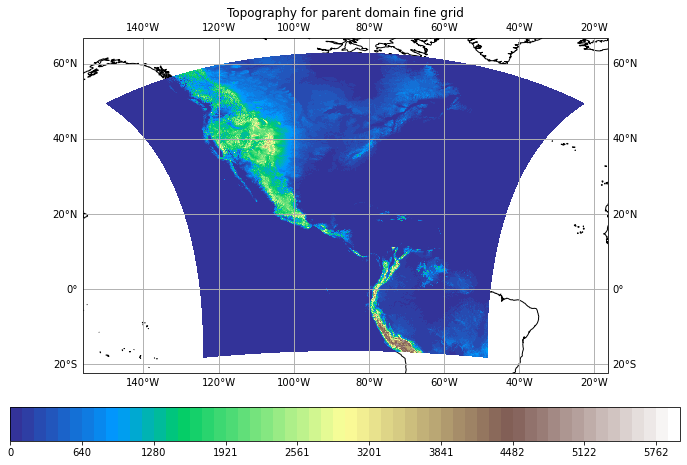

In [21]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = orog_fres.plot(ax=ax,
              x='geolon', y='geolat',
              levels=57, vmin=tmin_fres, vmax=tmax_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for parent domain fine grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [22]:
orog_fres['geolon'].min()

<xarray.DataArray 'geolon' ()>
array(210.22792053)

In [23]:
minLat1=orog_fin['geolat'].min()
maxLat1=orog_fin['geolat'].max()
minLon1=orog_fin['geolon'].min()
maxLon1=orog_fin['geolon'].max()
ypts = [minLat1, minLat1, maxLat1, maxLat1, minLat1 ]
xpts =  [minLon1, maxLon1, maxLon1, minLon1, minLon1 ]
xpts[0]

NameError: name 'orog_fin' is not defined

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


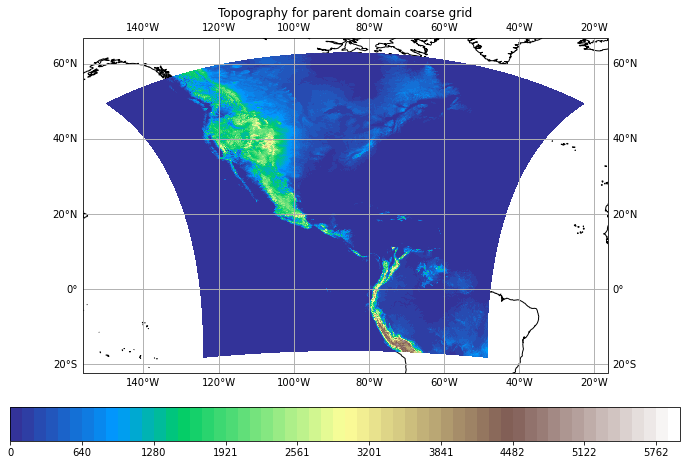

In [24]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = orog_crs.plot(ax=ax,
              x='geolon', y='geolat',
              levels=57, vmin=tmin_fres, vmax=tmax_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for parent domain coarse grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [25]:
orog_fres_sdim=orog_fres[1::3,1::3]
orog_fres_sdim.shape

(1320, 1320)

In [26]:
orog_fres.coords

Coordinates:
    geolon   (lat, lon) float32 337.2 337.1 337.1 337.1 ... 236.0 235.9 235.9
    geolat   (lat, lon) float32 ...

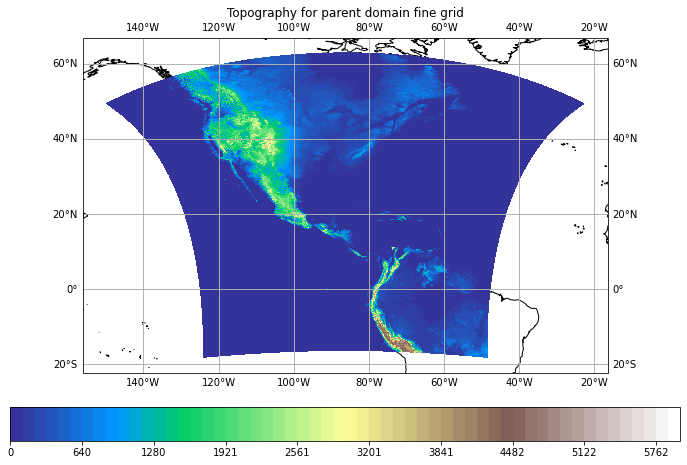

In [27]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = orog_fres_sdim.plot(ax=ax,
              x='geolon', y='geolat',
              levels=57, vmin=tmin_fres, vmax=tmax_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for parent domain fine grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [28]:
orog_fres_sdim=orog_fres[1::3,1::3]
orog_diff=orog_fres_sdim-orog_crs

In [29]:
orog_diff

<xarray.DataArray 'orog_filt' (lat: 1320, lon: 1320)>
array([[  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [ 11.026611 , -11.532288 , -23.14209  , ...,   0.       ,
          0.       ,   0.       ],
       [  2.3344727, -14.659424 ,  56.193726 , ...,   0.       ,
          0.       ,   0.       ],
       [-22.706665 , -47.4964   , -51.74359  , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)
Coordinates:
    geolon   (lat, lon) float32 337.1 337.1 337.0 336.9 ... 236.1 236.0 235.9
    geolat   (lat, lon) float32 49.39 49.43 49.46 49.5 ... -18.05 -18.06 -18.06
Dimensions without coordinates: lat, lon

In [30]:
tmin_diff=np.min(orog_diff);tmax_diff=np.max(orog_diff)
tmin_diff, tmax_diff

(<xarray.DataArray 'orog_filt' ()>
 array(-815.41717529),
 <xarray.DataArray 'orog_filt' ()>
 array(921.73266602))

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


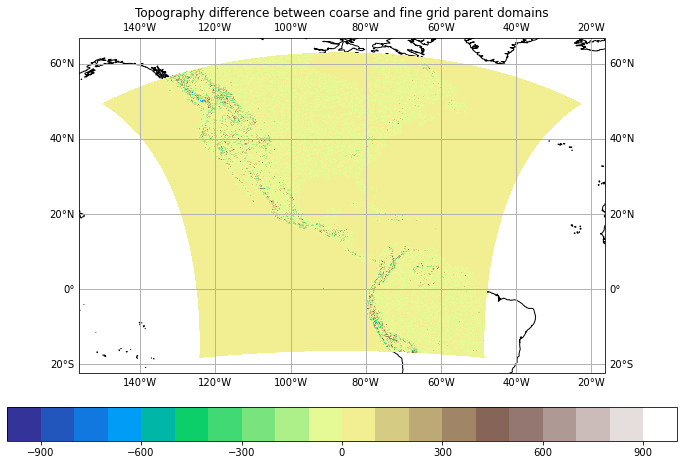

In [31]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = orog_diff.plot(ax=ax,
              x='geolon', y='geolat',
              levels=20, 
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography difference between coarse and fine grid parent domains')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [32]:
#lats_fres_oro = f2.variables['geolat'][:,:][0::3,0::3]
#lons_fres_oro = f2.variables['geolon'][:,:][0::3,0::3]
#lats_fres_oro

In [33]:
#ds_prep_fres,orog_fres,tmin_fres,tmax_fres=read_chgres_cube_prep(file_prep[1],'orog_filt')

In [34]:
orog_fres.shape

(3960, 3960)

In [35]:
ds_prep_nst,orog_nst,tmin_nst,tmax_nst=read_chgres_cube_prep(file_prep[2],'orog_filt')

In [36]:
orog_nst.shape

(600, 600)

In [37]:
orog_nst

<xarray.DataArray 'orog_filt' (lat: 600, lon: 600)>
array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,  661.1429,  665.25  ,  746.8   ],
       [   0.    ,    0.    ,    0.    , ..., 1478.25  , 1318.    , 1069.5   ],
       [   0.    ,    0.    ,    0.    , ..., 1500.75  , 1450.3334, 1233.6666]],
      dtype=float32)
Coordinates:
    geolon   (lat, lon) float32 ...
    geolat   (lat, lon) float32 ...
Dimensions without coordinates: lat, lon

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


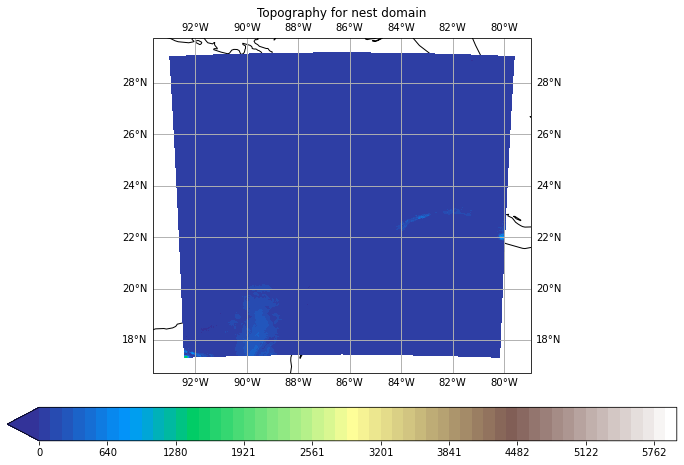

In [38]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = orog_nst.plot(ax=ax,
              x='geolon', y='geolat',
              levels=57,  vmin=tmin_fres, vmax=tmax_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for nest domain')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [39]:
lat_bnds= [np.min(orog_nst['geolat']),np.max(orog_nst['geolat'])]
lon_bnds = [np.min(orog_nst['geolon']),np.max(orog_nst['geolon'])]
lat_bnds,lon_bnds

([<xarray.DataArray 'geolat' ()>
  array(17.3343544),
  <xarray.DataArray 'geolat' ()>
  array(29.15345192)],
 [<xarray.DataArray 'geolon' ()>
  array(267.01693726),
  <xarray.DataArray 'geolon' ()>
  array(280.38308716)])

In [40]:
orog_nst.coords

Coordinates:
    geolon   (lat, lon) float32 280.4 280.4 280.3 280.3 ... 267.6 267.6 267.6
    geolat   (lat, lon) float32 29.01 29.01 29.01 29.01 ... 17.34 17.34 17.33

In [41]:
orog_crs.coords

Coordinates:
    geolon   (lat, lon) float32 ...
    geolat   (lat, lon) float32 ...

In [47]:
lat_cres=orog_crs['geolat']
lon_cres=orog_crs['geolon']
lon_cres

<xarray.DataArray 'geolon' (lat: 1320, lon: 1320)>
[1742400 values with dtype=float32]
Coordinates:
    geolon   (lat, lon) float32 ...
    geolat   (lat, lon) float32 ...
Dimensions without coordinates: lat, lon
Attributes:
    long_name:  Longitude
    units:      degrees_east

In [42]:
lat_fres=orog_fres_sdim['geolat']
lon_fres=orog_fres_sdim['geolon']
print(lon_fres)

<xarray.DataArray 'geolon' (lat: 1320, lon: 1320)>
array([[337.12762, 337.05704, 336.9864 , ..., 210.4136 , 210.34296, 210.27237],
       [337.06494, 336.99432, 336.92365, ..., 210.47633, 210.40567, 210.33507],
       [337.00238, 336.93176, 336.86108, ..., 210.53893, 210.46825, 210.39761],
       ...,
       [311.45215, 311.3915 , 311.33087, ..., 236.06914, 236.0085 , 235.94785],
       [311.45395, 311.39328, 311.33264, ..., 236.06737, 236.00673, 235.94606],
       [311.45575, 311.39508, 311.33444, ..., 236.06557, 236.00493, 235.94426]],
      dtype=float32)
Coordinates:
    geolon   (lat, lon) float32 337.1 337.1 337.0 336.9 ... 236.1 236.0 235.9
    geolat   (lat, lon) float32 ...
Dimensions without coordinates: lat, lon
Attributes:
    long_name:  Longitude
    units:      degrees_east


In [43]:
lat_inds_fres = np.where((lat_fres > lat_bnds[0]) & (lat_fres < lat_bnds[1]))
lon_inds_fres = np.where((lon_fres > lon_bnds[0]) & (lon_fres < lon_bnds[1]))
lon_inds_fres

(array([   0,    0,    0, ..., 1319, 1319, 1319], dtype=int64),
 array([603, 604, 605, ..., 777, 778, 779], dtype=int64))

In [44]:
lon_inds = np.where((orog_fres_sdim['geolon'][3,:] > lon_bnds[0]) & (orog_fres_sdim['geolon'][3,:] < lon_bnds[1]))
lon_inds

(array([602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614,
        615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627,
        628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640,
        641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653,
        654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666,
        667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679,
        680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692,
        693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705,
        706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717],
       dtype=int64),)

In [45]:
lat_inds

NameError: name 'lat_inds' is not defined

In [46]:
print(orog_fres_sdim['geolat'])

<xarray.DataArray 'geolat' (lat: 1320, lon: 1320)>
[1742400 values with dtype=float32]
Coordinates:
    geolon   (lat, lon) float32 337.1 337.1 337.0 336.9 ... 236.1 236.0 235.9
    geolat   (lat, lon) float32 ...
Dimensions without coordinates: lat, lon
Attributes:
    long_name:  Latitude
    units:      degrees_north


In [47]:
orog_fres_sdim['geolat'][1]

<xarray.DataArray 'geolat' (lon: 1320)>
array([49.35198 , 49.387268, 49.422527, ..., 49.422527, 49.387268, 49.35198 ],
      dtype=float32)
Coordinates:
    geolon   (lon) float32 337.1 337.0 336.9 336.9 ... 210.5 210.5 210.4 210.3
    geolat   (lon) float32 ...
Dimensions without coordinates: lon
Attributes:
    long_name:  Latitude
    units:      degrees_north

In [48]:
lat_inds_fres = np.where((orog_fres_sdim['geolat'] > lat_bnds[0]) & (orog_fres_sdim['geolat'] < lat_bnds[1]))
lon_inds_fres = np.where((orog_fres_sdim['geolon'] > lon_bnds[0]) & (orog_fres_sdim['geolon'] < lon_bnds[1]))
oro_subset_fres = orog_fres_sdim[0,lat_inds_fres,lon_inds_fres]

IndexError: too many indices

In [49]:
#lat_bnds, lon_bnds = [40, 43], [-96, -89]


oro_subset_fres

NameError: name 'oro_subset_fres' is not defined

NameError: name 'oro_subset_fres' is not defined

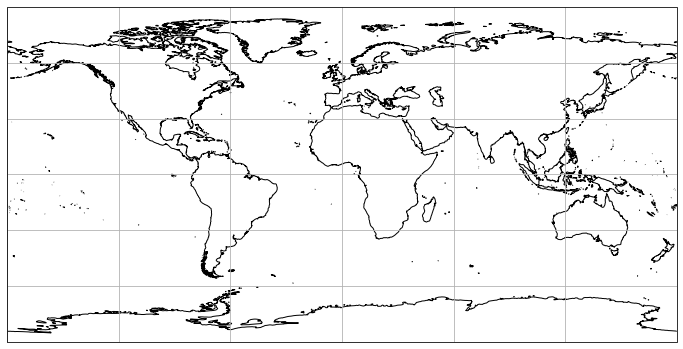

In [50]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = oro_subset_fres.plot(ax=ax,
              x='geolon', y='geolat',
              levels=57,  vmin=tmin_fin, vmax=tmax_fin,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for nest domain')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [51]:
lat_inds_cres = np.where((orog_crs['geolat'] > lat_bnds[0]) & (orog_crs['geolat'] < lat_bnds[1]))
lon_inds_cres = np.where((orog_crs['geolon'] > lon_bnds[0]) & (orog_crs['geolon'] < lon_bnds[1]))

oro_subset_cres = orog_crs[:,lat_inds_cres,lon_inds_cres]
oro_subset_cres.shape

IndexError: too many indices

In [52]:
file_prep

['C1536_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile8.nc']

In [53]:
file_prep[1]

'C512_oro_data.tile7.halo0.nc'

In [54]:
ds_slmsk_crs,slmsk_crs,tmin_slmsk_crs,tmax_slmsk_crs=read_chgres_cube_prep(file_prep[1],'slmsk')
np.unique(slmsk_crs)

array([0., 1.], dtype=float32)

In [108]:
ds_slmsk_crs.info()

xarray.Dataset {
dimensions:
	lat = 1320 ;
	lon = 1320 ;

variables:
	float32 geolon(lat, lon) ;
		geolon:long_name = Longitude ;
		geolon:units = degrees_east ;
	float32 geolat(lat, lon) ;
		geolat:long_name = Latitude ;
		geolat:units = degrees_north ;
	float32 slmsk(lat, lon) ;
	float32 land_frac(lat, lon) ;
	float32 orog_raw(lat, lon) ;
	float32 orog_filt(lat, lon) ;
	float32 stddev(lat, lon) ;
	float32 convexity(lat, lon) ;
	float32 oa1(lat, lon) ;
	float32 oa2(lat, lon) ;
	float32 oa3(lat, lon) ;
	float32 oa4(lat, lon) ;
	float32 ol1(lat, lon) ;
	float32 ol2(lat, lon) ;
	float32 ol3(lat, lon) ;
	float32 ol4(lat, lon) ;
	float32 theta(lat, lon) ;
	float32 gamma(lat, lon) ;
	float32 sigma(lat, lon) ;
	float32 elvmax(lat, lon) ;

// global attributes:
}

In [55]:
slmsk_crs.shape

(1320, 1320)

In [56]:
slmsk_crs

<xarray.DataArray 'slmsk' (lat: 1320, lon: 1320)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    geolon   (lat, lon) float32 ...
    geolat   (lat, lon) float32 ...
Dimensions without coordinates: lat, lon

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


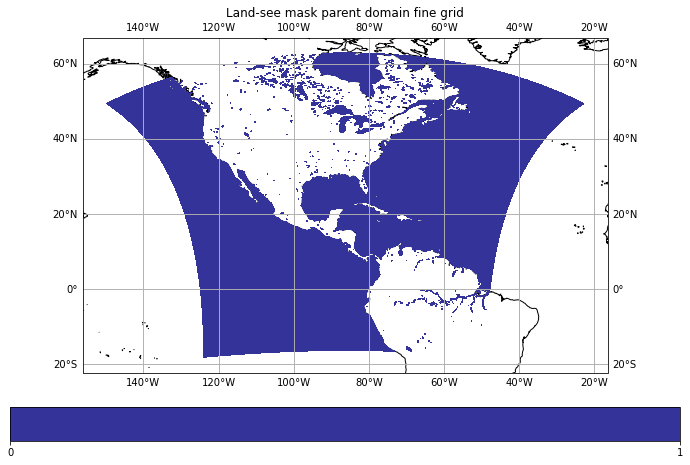

In [57]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = slmsk_crs.plot(ax=ax,
              x='geolon', y='geolat',
              levels=2,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land-see mask parent domain fine grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [58]:
ds_slmsk_fres,slmsk_fres,tmin_slmsk_fres,tmax_slmsk_fres=read_chgres_cube_prep(file_prep[0],'slmsk')
np.unique(slmsk_fres)

array([0., 1.], dtype=float32)

In [59]:
slmsk_fres_sdim=slmsk_fres[1::3,1::3]
slmsk_fres_sdim

<xarray.DataArray 'slmsk' (lat: 1320, lon: 1320)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    geolon   (lat, lon) float32 ...
    geolat   (lat, lon) float32 ...
Dimensions without coordinates: lat, lon

In [60]:
slmsk_fres_sdim.shape

(1320, 1320)

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


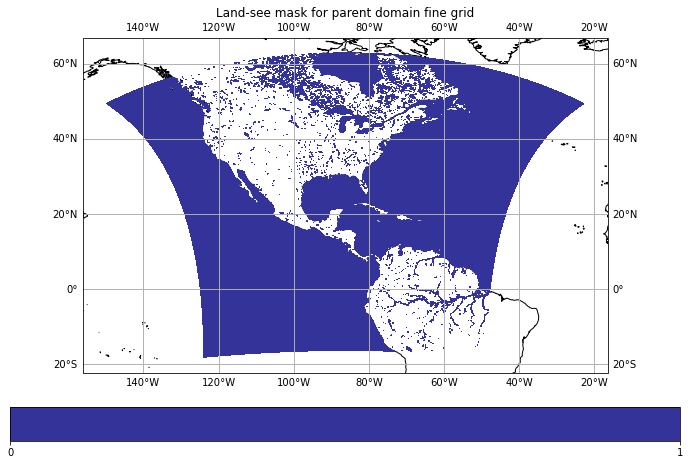

In [61]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = slmsk_fres_sdim.plot(ax=ax,
              x='geolon', y='geolat',
              levels=2,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land-see mask for parent domain fine grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [62]:
slmsk_fres_sdim=slmsk_fres[1::3,1::3]
diff_slmsk=slmsk_fres_sdim-slmsk_crs
diff_slmsk.shape

(1320, 1320)

In [63]:
diff_slmsk

<xarray.DataArray 'slmsk' (lat: 1320, lon: 1320)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    geolon   (lat, lon) float32 337.1 337.1 337.0 336.9 ... 236.1 236.0 235.9
    geolat   (lat, lon) float32 49.39 49.43 49.46 49.5 ... -18.05 -18.06 -18.06
Dimensions without coordinates: lat, lon

In [64]:
np.min(diff_slmsk)

<xarray.DataArray 'slmsk' ()>
array(-1.)

In [65]:
np.max(diff_slmsk)

<xarray.DataArray 'slmsk' ()>
array(1.)

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


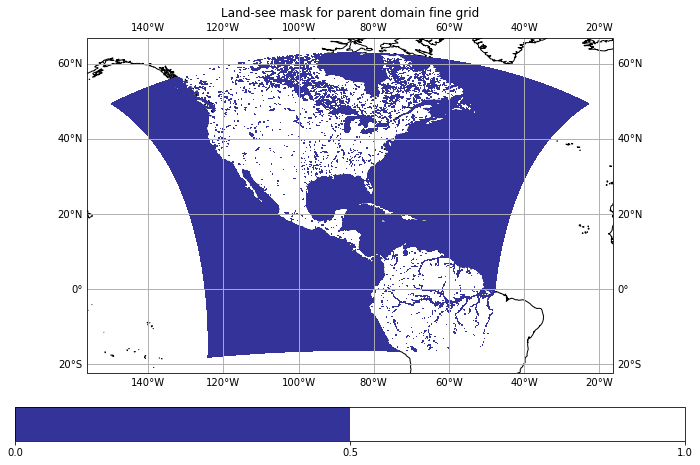

In [66]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = slmsk_fres_sdim.plot(ax=ax,
              x='geolon', y='geolat',
              levels=3,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land-see mask for parent domain fine grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

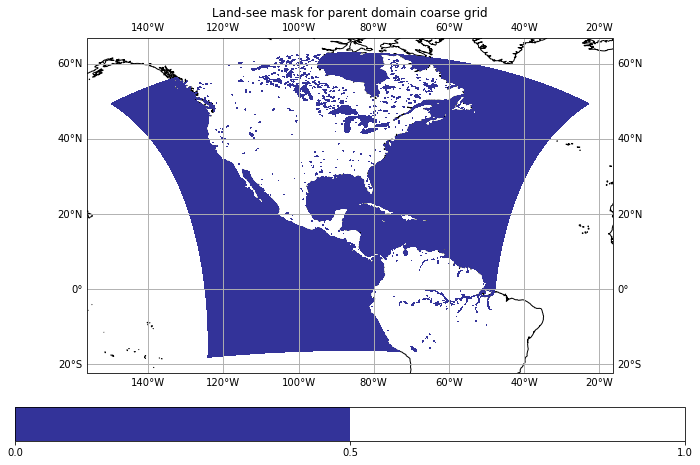

In [67]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = slmsk_crs.plot(ax=ax,
              x='geolon', y='geolat',
              levels=3,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land-see mask for parent domain coarse grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

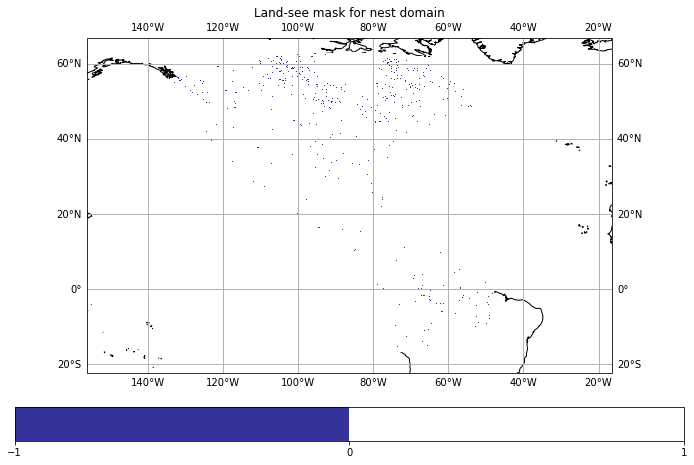

In [68]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = diff_slmsk.plot(ax=ax,
              x='geolon', y='geolat',
              levels=3,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land-see mask for nest domain')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [69]:
ds_slmsk_nst,slmsk_nst,tmin_slmsk_nst,tmax_slmsk_nst=read_chgres_cube_prep(file_prep[2],'slmsk')
np.unique(slmsk_nst)

array([0., 1.], dtype=float32)

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


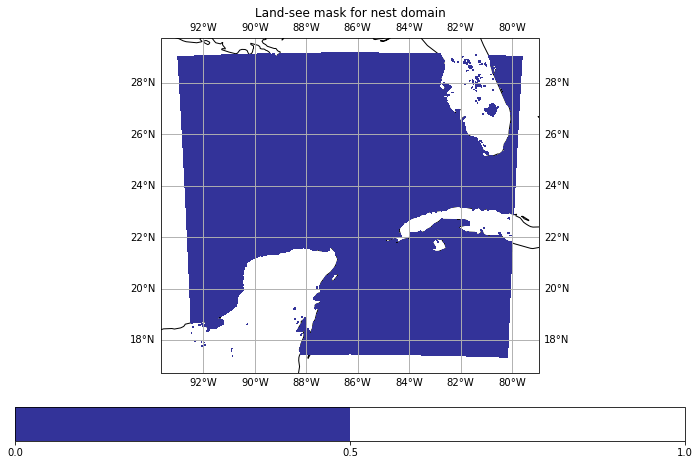

In [70]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = slmsk_nst.plot(ax=ax,
              x='geolon', y='geolat',
              levels=3,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land-see mask for nest domain')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [71]:
file_prep

['C1536_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile7.halo0.nc',
 'C512_oro_data.tile8.nc']

In [72]:
ds_lfrac_fres,lfrac_fres,tmin_lfrac_fres,tmax_lfrac_fres=read_chgres_cube_prep(file_prep[0],'land_frac')
np.unique(lfrac_fres)

array([0.        , 0.06666667, 0.07142857, 0.07692308, 0.08333334,
       0.09090909, 0.1       , 0.11111111, 0.125     , 0.13333334,
       0.14285715, 0.15384616, 0.16666667, 0.18181819, 0.2       ,
       0.21428572, 0.22222222, 0.23076923, 0.25      , 0.26666668,
       0.27272728, 0.2857143 , 0.3       , 0.30769232, 0.33333334,
       0.35714287, 0.36363637, 0.375     , 0.3846154 , 0.4       ,
       0.41666666, 0.42857143, 0.44444445, 0.45454547, 0.46153846,
       0.46666667, 0.5       , 0.53333336, 0.53846157, 0.54545456,
       0.5555556 , 0.5714286 , 0.5833333 , 0.6       , 0.61538464,
       0.625     , 0.6363636 , 0.64285713, 0.6666667 , 0.6923077 ,
       0.7       , 0.71428573, 0.72727275, 0.73333335, 0.75      ,
       0.7692308 , 0.7777778 , 0.78571427, 0.8       , 0.8181818 ,
       0.8333333 , 0.84615386, 0.85714287, 0.8666667 , 0.875     ,
       0.8888889 , 0.9       , 0.90909094, 0.9166667 , 0.9230769 ,
       0.9285714 , 0.93333334, 1.        ], dtype=float32)

In [73]:
lfrac_fres.shape

(3960, 3960)

In [74]:
lfrac_fres_sdim=lfrac_fres[1::3,1::3]
lfrac_fres_sdim.shape

(1320, 1320)

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


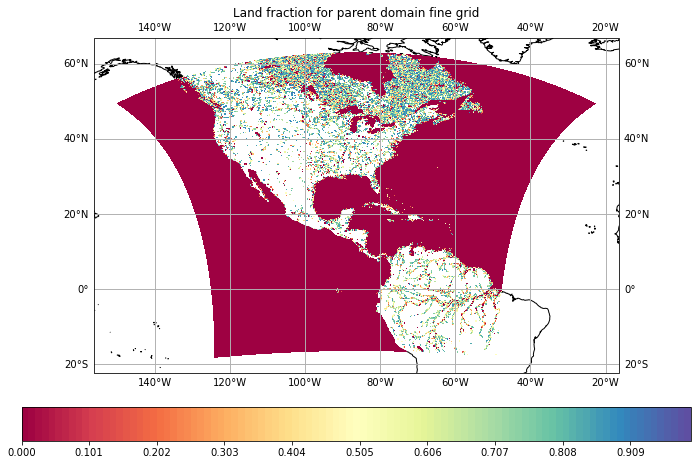

In [75]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('Spectral')
p1 = lfrac_fres_sdim.plot(ax=ax,
              x='geolon', y='geolat',
              levels=100, vmin=tmin_lfrac_fres, vmax=tmax_lfrac_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land fraction for parent domain fine grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [76]:
tmin_lfrac_fres, tmax_lfrac_fres

(<xarray.DataArray 'land_frac' ()>
 array(0.),
 <xarray.DataArray 'land_frac' ()>
 array(1.))

In [77]:
ds_lfrac_crs,lfrac_crs,tmin_lfrac_crs,tmax_lfrac_fres=read_chgres_cube_prep(file_prep[1],'land_frac')
np.unique(lfrac_crs)

array([0.        , 0.00892857, 0.00961538, ..., 0.9909091 , 0.9910714 ,
       1.        ], dtype=float32)

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


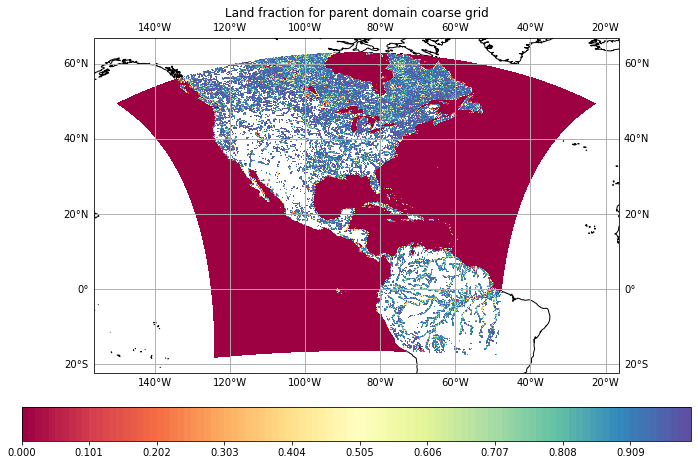

In [78]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('Spectral')
p1 = lfrac_crs.plot(ax=ax,
              x='geolon', y='geolat',
              levels=100, vmin=tmin_lfrac_fres, vmax=tmax_lfrac_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land fraction for parent domain coarse grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [79]:
ds_lfrac_nst,lfrac_nst,tmin_lfrac_nst,tmax_lfrac_nst=read_chgres_cube_prep(file_prep[2],'land_frac')
np.unique(lfrac_nst)

array([0.        , 0.11111111, 0.125     , 0.14285715, 0.16666667,
       0.2       , 0.22222222, 0.25      , 0.2857143 , 0.33333334,
       0.375     , 0.4       , 0.42857143, 0.44444445, 0.5       ,
       0.5555556 , 0.5714286 , 0.6       , 0.625     , 0.6666667 ,
       0.71428573, 0.75      , 0.7777778 , 0.8       , 0.8333333 ,
       0.85714287, 0.875     , 0.8888889 , 1.        ], dtype=float32)

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


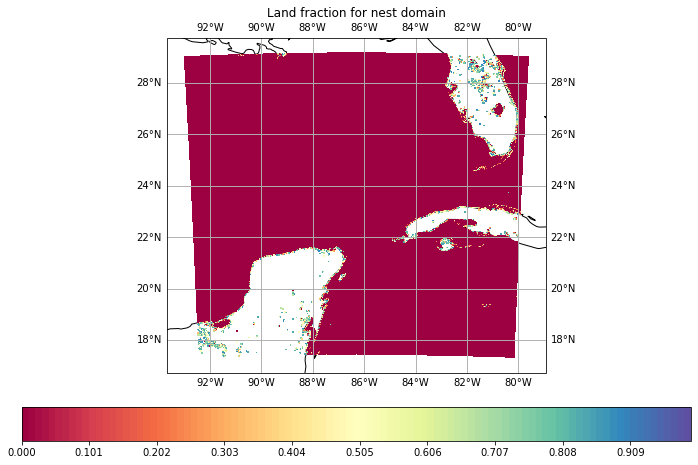

In [80]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('Spectral')
p1 = lfrac_nst.plot(ax=ax,
              x='geolon', y='geolat',
              levels=100, vmin=tmin_lfrac_fres, vmax=tmax_lfrac_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land fraction for nest domain')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [81]:
lfrac_fres_sdim=lfrac_fres[1::3,1::3]
diff_lfrac=lfrac_fres_sdim-lfrac_crs
diff_lfrac

<xarray.DataArray 'land_frac' (lat: 1320, lon: 1320)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    geolon   (lat, lon) float32 337.1 337.1 337.0 336.9 ... 236.1 236.0 235.9
    geolat   (lat, lon) float32 49.39 49.43 49.46 49.5 ... -18.05 -18.06 -18.06
Dimensions without coordinates: lat, lon

In [82]:
#Land-see mask difference between coarse and fine grid parent domains

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


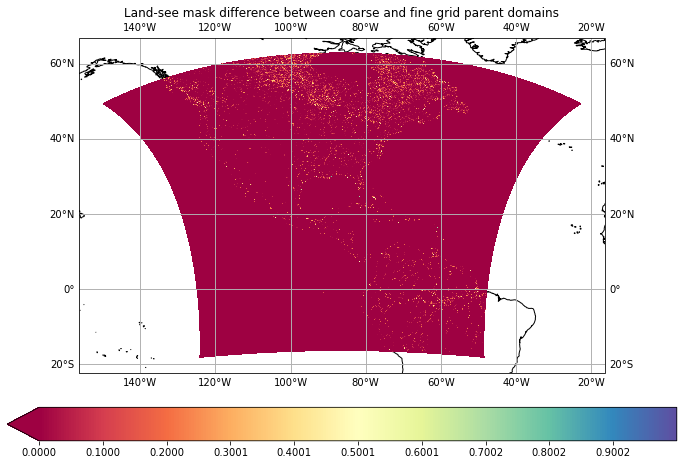

In [83]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('Spectral')
p1 = diff_lfrac.plot(ax=ax,
              x='geolon', y='geolat',
              levels=len(np.unique(diff_lfrac)), vmin=tmin_lfrac_fres, vmax=tmax_lfrac_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land-see mask difference between coarse and fine grid parent domains')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [84]:
ds_lfrac_nst,lfrac_nst,tmin_lfrac_nst,tmax_lfrac_nst=read_chgres_cube_prep(file_prep[2],'land_frac')
len(np.unique(lfrac_nst))

29

C:\Users\bantwale.enyew\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


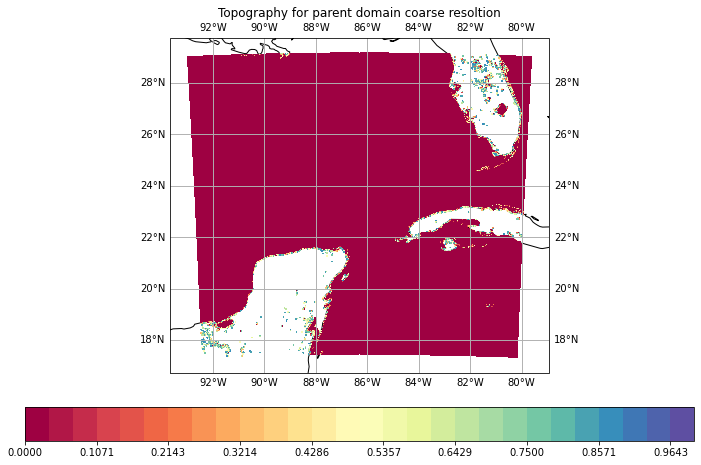

In [85]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('Spectral')
p1 = lfrac_nst.plot(ax=ax,
              x='geolon', y='geolat',
              levels=len(np.unique(lfrac_nst)), vmin=tmin_lfrac_fres, vmax=tmax_lfrac_fres,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for parent domain coarse resoltion')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

In [86]:
x=xpts
y=ypts

NameError: name 'xpts' is not defined

In [ ]:
import cv2
import numpy as np
from shapely.geometry import Polygon

#x = [10, 30, 70]
#y = [15, 45, 90]
alpha = 0.5 # that's your transparency factor
path = 'filtertopo@2m_ic_prtn_dom_fineres.png'

polygon = Polygon([(x[0], y[0]), (x[1], y[1]), (x[2], y[2]), (x[0], y[2])])
int_coords = lambda x: np.array(x).round().astype(np.int32)
exterior = [int_coords(polygon.exterior.coords)]

image = cv2.imread(path)
overlay = image.copy()
cv2.fillPoly(overlay, exterior, color=(255, 255, 0))
cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
cv2.imshow("Polygon", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
ds_prep_crs,orog_crs,tmin_crs,tmax_crs=read_chgres_cube_prep(file_prep[1],'orog_filt')

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = orog_crs.plot(ax=ax,
              x='geolon', y='geolat',
              levels=57, vmin=tmin_fin, vmax=tmax_fin,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for parent domain coarse resolution')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
plt.savefig('filtertopo@2m_ic_prtn_dom.png')

In [ ]:
ds_prep_nst,orog,tmin,tmax=read_chgres_cube_prep(file_prep[2],'orog_filt')

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = orog.plot(ax=ax,
              x='geolon', y='geolat',
              levels=7,
              vmin=tmin, vmax=tmax,
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Topography for nest domain')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
plt.savefig('filtertopo@2m_ic_nst_dom.png')

In [ ]:
def read_chgres_cube_ic(file,var):
    ds=xr.open_dataset(file)
    var=ds[var][:, :, :]
    #assign physical coordinate
    vmin=np.min(var)
    vmax=np.max(var)
    return ds,var,vmin,vmax
    
    

In [ ]:
file_ic

In [ ]:
ds_ic_vt,vtype,vtmin,vtmax=read_chgres_cube_ic(file_ic[2],'vtype')

In [ ]:
vtmin,vtmax

In [ ]:
vtype

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = vtype.plot(ax=ax,
              x='geolon', y='geolat',
              levels=33, 
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='horizontal')
cb.ax.set_ylabel('Temprature at 2m  (K)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_ic_prtn_dom.png')

In [ ]:
ds_ic_vt_nst,vtype_nst,vtmin,vtmax=read_chgres_cube_ic(file_ic[3],'vtype')

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = vtype_nst.plot(ax=ax,
              x='geolon', y='geolat',
              levels=33, 
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='horizontal')
cb.ax.set_ylabel('Temprature at 2m  (K)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_ic_prtn_dom.png')

In [ ]:
ds_ic_st,stype,stmin,stmax=read_chgres_cube_ic(file_ic[2],'stype')

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = stype.plot(ax=ax,
              x='geolon', y='geolat',
              levels=33, 
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='horizontal')
cb.ax.set_ylabel('Temprature at 2m  (K)')
ax.gridlines(draw_labels=True)

In [ ]:
ds_ic_st_nst,stype_nst,stmin,stmax=read_chgres_cube_ic(file_ic[3],'vtype')

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('terrain')
p1 = stype_nst.plot(ax=ax,
              x='geolon', y='geolat',
              levels=33, 
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='horizontal')
cb.ax.set_ylabel('Temprature at 2m  (K)')
ax.gridlines(draw_labels=True)

In [ ]:
ds_ic,t2m,tmin,tmax=read_chgres_cube_ic(file_ic[1],'t2m')

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = t2m.plot(ax=ax,
              x='geolon', y='geolat',
              levels=33, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='horizontal')
cb.ax.set_ylabel('Temprature at 2m  (K)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_ic_nest_dom.png')

In [ ]:
ds_fl=xr.open_mfdataset('./sfc_data*.nc', parallel=True)
ds_fl

#### Function to load netcdf dataset using xarray

In [ ]:
file_ic=glob.glob("*sfc_data*.nc")
file_ic

In [141]:
def loadData_assingCord_sfc(file,var):
    '''
    This function will load netCDF data using xarray
    and extract a given varaible and also assign physical 
    coordinate to the extracted variable 
    
    '''
    ds=xr.open_dataset(file)
    var=ds[var][0, :, :]
    #assign physical coordinate
    #lon=ds.xaxis_1
    #lat=ds.yaxis_1
    #var=var.assign_coords({'lat': lat, 'lon': lon})
    return ds,var

In [142]:
ds_fsfc_veg_vr,vtype_vr=loadData_assingCord_sfc('C512.vegetation_type_viirs.tile7.halo0.nc','vegetation_type')

### VIIRS-BASED IGBP VEGETATION TYPE

In [164]:
unique(vtype_vr),len(unique(vtype_vr))

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 18., 19., 20., nan], dtype=float32),
 20)

In [165]:
ds_fsfc_veg,vtype_nr=loadData_assingCord_sfc('C512.vegetation_type.tile7.halo0.nc','vegetation_type')

In [166]:
unique(vtype_nr),len(unique(vtype_nr))

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 18., 19., nan], dtype=float32),
 19)

In [147]:
ds_fsfc_veg_vr.info(

xarray.Dataset {
dimensions:
	time = 1 ;
	ny = 1320 ;
	nx = 1320 ;

variables:
	datetime64[ns] time(time) ;
	float32 geolat(ny, nx) ;
		geolat:long_name = Latitude ;
		geolat:units = degrees_north ;
	float32 geolon(ny, nx) ;
		geolon:long_name = Longitude ;
		geolon:units = degrees_east ;
	float32 vegetation_type(time, ny, nx) ;

// global attributes:
	:source = VIIRS-BASED IGBP VEGETATION TYPE ;
}

In [145]:
vtype_vr.max(), vtype_vr.min()

(<xarray.DataArray 'vegetation_type' ()>
 array(20.)
 Coordinates:
     time     datetime64[ns] 2015-01-01,
 <xarray.DataArray 'vegetation_type' ()>
 array(1.)
 Coordinates:
     time     datetime64[ns] 2015-01-01)

In [148]:
vtype_vr=ds_fsfc_veg_vr['vegetation_type'][0, :, :]
lon=ds_fsfc_veg_vr.geolon
lat=ds_fsfc_veg_vr.geolat
vtype_vr = vtype_vr.assign_coords({'lat': lat, 'lon': lon})
vtype_vr.coords

Coordinates:
    time     datetime64[ns] 2015-01-01
    geolat   (ny, nx) float32 49.39 49.43 49.46 49.5 ... -18.05 -18.06 -18.06
    geolon   (ny, nx) float32 337.1 337.1 337.0 336.9 ... 236.1 236.0 235.9
    lat      (ny, nx) float32 ...
    lon      (ny, nx) float32 ...

TypeError: iteration over a 0-d array

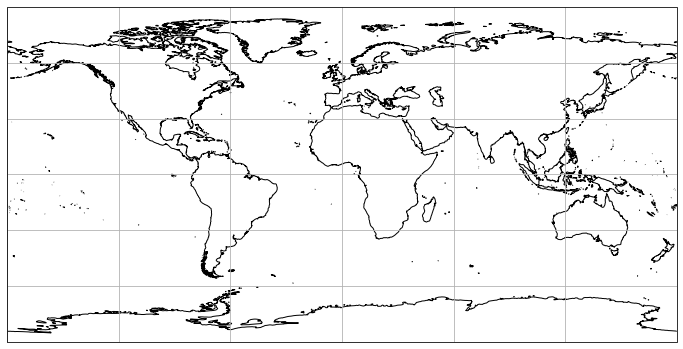

In [151]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('Spectral')
p1 = vtype_vr.plot(ax=ax,
              x='geolon', y='geolat',
              levels=vtype_vr.max(), vmin=vtype_vr.min(), vmax=vtype_vr.max(),
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
plt.title('Land fraction for parent domain coarse grid')
cb = plt.colorbar(p1, orientation='horizontal', pad=0.08)
cb.ax.set_ylabel('')
ax.gridlines(draw_labels=True)
#plt.savefig('filtertopo@2m_ic_prtn_dom_fineres.png')
plt.show()

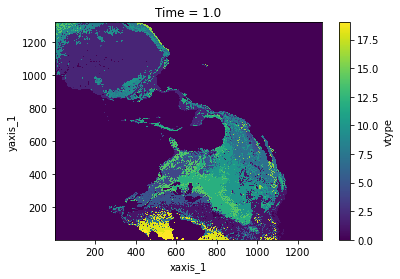

In [129]:
ds_veg,vtype=loadData_assingCord_sfc('20200825.180000.sfc_data.nc','vtype')
vtype.plot()

In [130]:
ds_veg['vtype'].shape

(1, 1320, 1320)

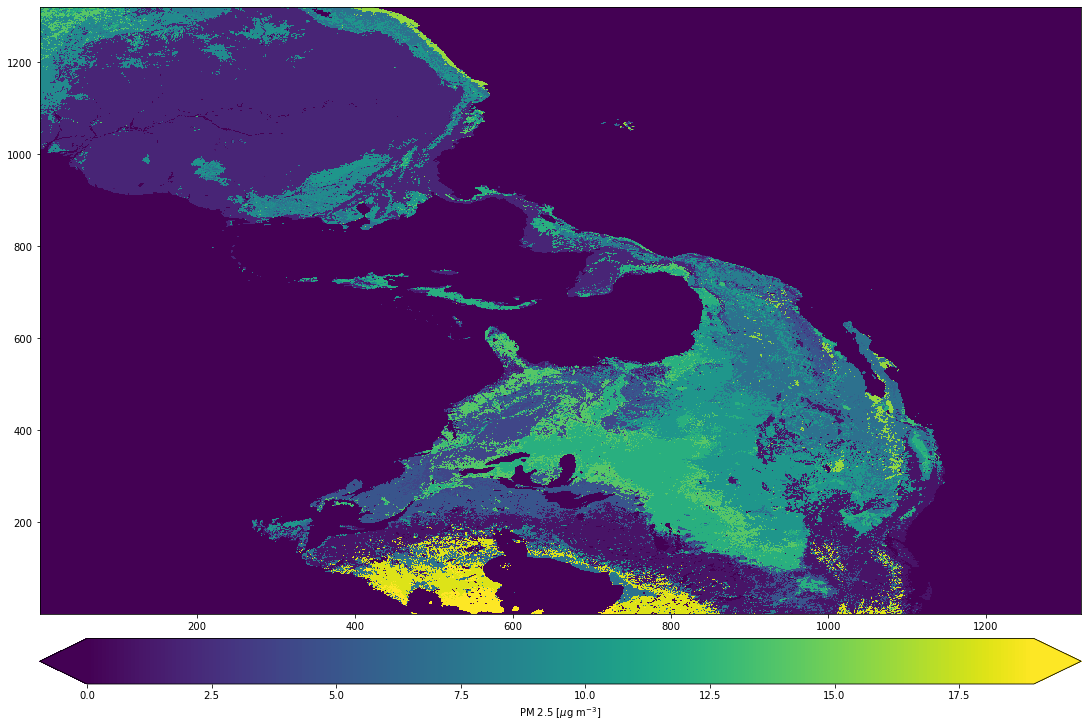

In [131]:
from netCDF4 import Dataset
nc_fid = Dataset('20200825.180000.sfc_data.nc', 'r')

lats = nc_fid.variables['yaxis_1'][:]  # extract/copy the data
lons = nc_fid.variables['xaxis_1'][:]
PM25 = nc_fid.variables['vtype'][:]

fig, axs = plt.subplots(figsize=(15, 10), nrows=2,ncols=1,gridspec_kw={'height_ratios': [20,1.5]},constrained_layout=True)
pcm=axs[0].pcolormesh(lons,lats,PM25[0,:,:],cmap='viridis')
cbar=fig.colorbar(pcm,cax=axs[1], extend='both', orientation='horizontal')
cbar.set_label('PM 2.5 [$\mu$g m$^{-3}]$')

In [132]:
ds_veg.info()

xarray.Dataset {
dimensions:
	xaxis_1 = 1320 ;
	yaxis_1 = 1320 ;
	zaxis_1 = 2 ;
	zaxis_2 = 4 ;
	Time = 1 ;

variables:
	float64 xaxis_1(xaxis_1) ;
		xaxis_1:cartesian_axis = X ;
	float64 yaxis_1(yaxis_1) ;
		yaxis_1:cartesian_axis = Y ;
	float64 zaxis_1(zaxis_1) ;
		zaxis_1:cartesian_axis = Z ;
	float64 zaxis_2(zaxis_2) ;
		zaxis_2:cartesian_axis = Z ;
	float64 Time(Time) ;
		Time:cartesian_axis = T ;
	float64 slmsk(Time, yaxis_1, xaxis_1) ;
		slmsk:checksum = 6E60000000000000 ;
	float64 tsea(Time, yaxis_1, xaxis_1) ;
		tsea:checksum = 7EF8A64E32C4BB73 ;
	float64 sheleg(Time, yaxis_1, xaxis_1) ;
		sheleg:checksum = EFAEEABCDB2BBBAE ;
	float64 tg3(Time, yaxis_1, xaxis_1) ;
		tg3:checksum = D61A7C1AB830BEB5 ;
	float64 zorl(Time, yaxis_1, xaxis_1) ;
		zorl:checksum = ED281D88BCD202DB ;
	float64 alvsf(Time, yaxis_1, xaxis_1) ;
		alvsf:checksum = AAFA542599148088 ;
	float64 alvwf(Time, yaxis_1, xaxis_1) ;
		alvwf:checksum = F1A5A18CD51479BB ;
	float64 alnsf(Time, yaxis_1, xaxis_1) ;
		alnsf

In [133]:
lon=ds_veg.yaxis_1
len(lon.values.tolist())

1320

In [134]:
vtype.lat

AttributeError: 'DataArray' object has no attribute 'lat'

In [135]:
vtype.coords


Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0 4.0 ... 1.318e+03 1.319e+03 1.32e+03
  * yaxis_1  (yaxis_1) float64 1.0 2.0 3.0 4.0 ... 1.318e+03 1.319e+03 1.32e+03
    Time     float64 1.0

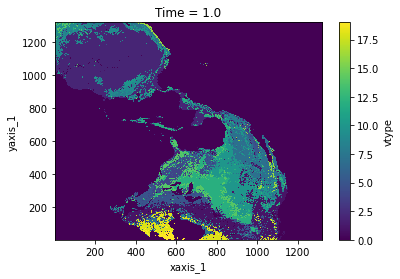

In [136]:
vtype.plot.imshow()

In [137]:
vtype

<xarray.DataArray 'vtype' (yaxis_1: 1320, xaxis_1: 1320)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [14., 14., 14., ...,  0.,  0.,  0.],
       [ 8., 14., 14., ...,  0.,  0.,  0.],
       [14., 14.,  9., ...,  0.,  0.,  0.]])
Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0 4.0 ... 1.318e+03 1.319e+03 1.32e+03
  * yaxis_1  (yaxis_1) float64 1.0 2.0 3.0 4.0 ... 1.318e+03 1.319e+03 1.32e+03
    Time     float64 1.0
Attributes:
    checksum:  34D8000000000000

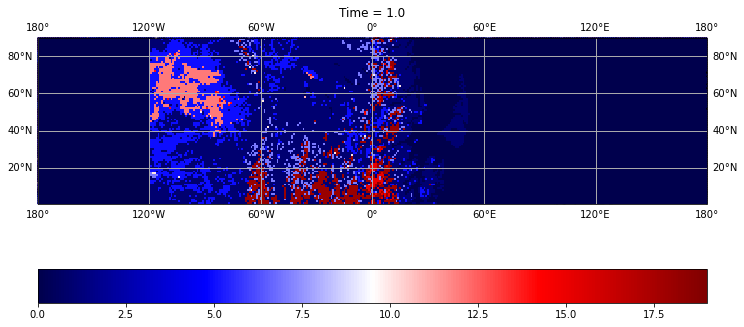

In [140]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)
cmap = plt.get_cmap('seismic')
p1 = vtype.plot(ax=ax,
              x='xaxis_1', y='yaxis_1',
              cmap=cmap,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

#plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='horizontal')
cb.ax.set_ylabel('Temprature at 2m  (K)')
ax.gridlines(draw_labels=True)
#plt.savefig('temprature@2m_ic_prtn_dom.png')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
ds,tmp2m_003=loadData_assingCord_sfc('sfcf009.nc','tmp2m')
ds_360,tmp2m_360=loadData_assingCord_sfc('sfcf009_360.nc','tmp2m')
ds_360_diff_span,tmp2m_360_diff_span=loadData_assingCord_sfc('sfcf009_360_diff_span.nc','tmp2m')


In [ ]:
ds,tmp2m_003.info()

In [ ]:
ds.info()

In [ ]:
tmp2m=ds['tmp2m'][0, :, :]
lon=ds.lon
lat=ds.lat
tmp2m = tmp2m.assign_coords({'lat': lat, 'lon': lon})
tmp2m.coords

In [ ]:
tmp2m_360=ds_360['tmp2m'][0, :, :]
lon=ds_360.lon
lat=ds_360.lat
tmp2m_360 = tmp2m_360.assign_coords({'lat': lat, 'lon': lon})
tmp2m_360.coords

In [16]:

tmp2m_360_diff_span=ds_360_diff_span['tmp2m'][0, :, :]
lon=ds_360_diff_span.lon
lat=ds_360_diff_span.lat
tmp2m_360_diff_span = tmp2m_360_diff_span.assign_coords({'lat': lat, 'lon': lon})
tmp2m_360_diff_span.coords

Coordinates:
    time     object 2020-08-25 21:00:00
  * grid_xt  (grid_xt) float64 -27.65 -27.55 -27.45 -27.35 ... 27.45 27.55 27.65
  * grid_yt  (grid_yt) float64 -27.65 -27.55 -27.45 -27.35 ... 27.45 27.55 27.65
    lat      (grid_yt, grid_xt) float64 ...
    lon      (grid_yt, grid_xt) float64 ...

#### Plotting 2m Temprature

In [17]:
tmin=np.min(tmp2m)
tmax=np.max(tmp2m)
tmin,tmax

(<xarray.DataArray 'tmp2m' ()>
 array(260.14471436)
 Coordinates:
     time     object 2020-08-25 21:00:00,
 <xarray.DataArray 'tmp2m' ()>
 array(319.24276733)
 Coordinates:
     time     object 2020-08-25 21:00:00)

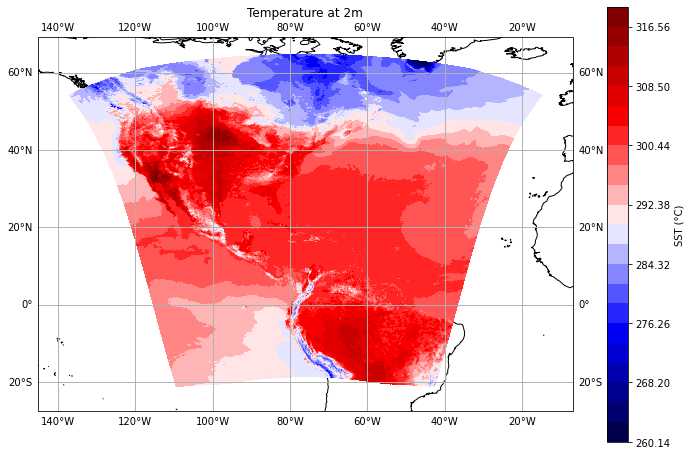

In [18]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m.plot(ax=ax,
              x='lon', y='lat',
              levels=23, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='vertical')
cb.ax.set_ylabel('SST (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_prtn_dom.png')

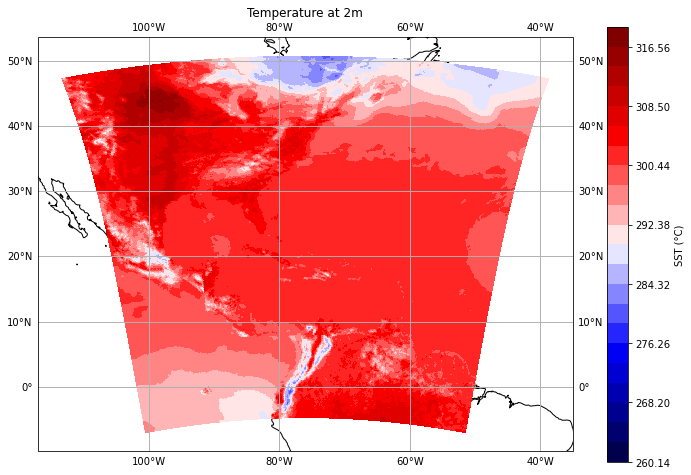

In [19]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m_360.plot(ax=ax,
              x='lon', y='lat',
              levels=23, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='vertical')
cb.ax.set_ylabel('SST (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_prtn_dom.png')

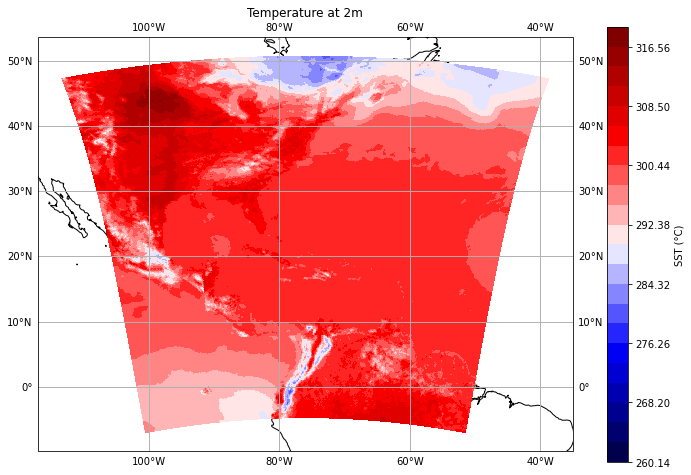

In [20]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m_360_diff_span.plot(ax=ax,
              x='lon', y='lat',
              levels=23, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, orientation='vertical')
cb.ax.set_ylabel('SST (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_prtn_dom.png')

#### PLot for the nest domain

In [22]:
ds_nst,tmp2m_nst_003=loadData_assingCord_sfc('sfc.nest02.f009.nc','tmp2m')

#ds_nst_diff_span,tmp2m_nst_diff_span=loadData_assingCord_sfc('sfc.nest02.f009_diff_span.nc','tmp2m')

In [23]:
tmp2m_nst_003.coords

Coordinates:
    time     object 2020-08-25 21:00:00
  * grid_xt  (grid_xt) float64 -41.65 -41.55 -41.45 -41.35 ... 41.45 41.55 41.65
  * grid_yt  (grid_yt) float64 -41.65 -41.55 -41.45 -41.35 ... 41.45 41.55 41.65
    lat      (grid_yt, grid_xt) float64 ...
    lon      (grid_yt, grid_xt) float64 ...

In [24]:
tmin=np.min(tmp2m_nst_003)
tmax=np.max(tmp2m_nst_003)
tmin,tmax

(<xarray.DataArray 'tmp2m' ()>
 array(280.61560059)
 Coordinates:
     time     object 2020-08-25 21:00:00,
 <xarray.DataArray 'tmp2m' ()>
 array(311.27682495)
 Coordinates:
     time     object 2020-08-25 21:00:00)

In [25]:
tmp2m_nst=ds_nst['tmp2m'][0, :, :]
lon=ds_nst.lon
lat=ds_nst.lat
tmp2m_nst = tmp2m_nst.assign_coords({'lat': lat, 'lon': lon})
tmp2m_nst.coords

Coordinates:
    time     object 2020-08-25 21:00:00
  * grid_xt  (grid_xt) float64 -41.65 -41.55 -41.45 -41.35 ... 41.45 41.55 41.65
  * grid_yt  (grid_yt) float64 -41.65 -41.55 -41.45 -41.35 ... 41.45 41.55 41.65
    lat      (grid_yt, grid_xt) float64 ...
    lon      (grid_yt, grid_xt) float64 ...

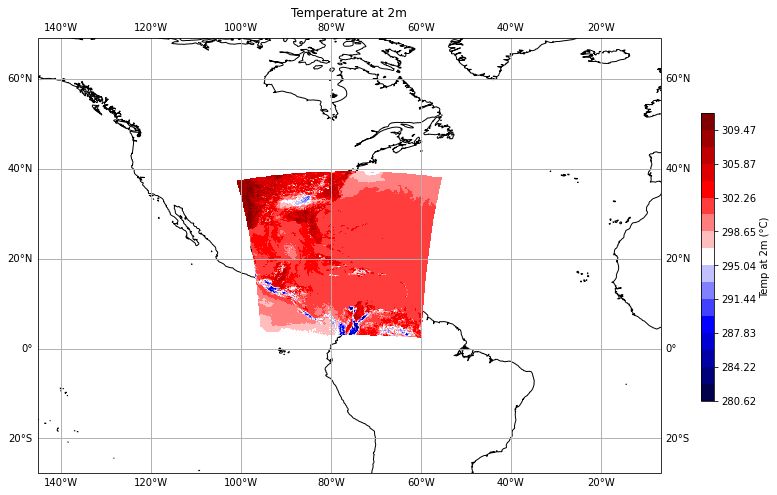

In [26]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m_nst.plot(ax=ax,
              x='lon', y='lat',
              levels=18, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Temp at 2m (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_nest_dom.png')

In [27]:
file_fr400_09hr

['sfc.nest02.f009_440.nc', 'sfcf009_440.nc']

In [55]:
ds_nst_f440,tmp2m_nst_440=loadData_assingCord_sfc('sfc.nest02.f009_440.nc','tmp2m')
ds_nst_f360,tmp2m_nst_360=loadData_assingCord_sfc('sfc.nest02.f009_360.nc','tmp2m')
ds_nst_f360_diff_span,tmp2m_nst_360_diff_span=loadData_assingCord_sfc('sfc.nest02.f009_360_diff_span.nc','tmp2m')


In [75]:
ds_nst_f441_diff_span,tmp2m_nst_441_diff_span=loadData_assingCord_sfc('sfc.nest02.f009_441_span.nc','tmp2m')

In [76]:
tmp2m_nst_f440=ds_nst_f440['tmp2m'][0, :, :]
lon=ds_nst_f440.lon
lat=ds_nst_f440.lat
tmp2m_nst_440 = tmp2m_nst_f440.assign_coords({'lat': lat, 'lon': lon})
tmp2m_nst_440.coords

Coordinates:
    time     object 2020-08-25 21:00:00
  * grid_xt  (grid_xt) float64 -41.65 -41.55 -41.45 -41.35 ... 41.45 41.55 41.65
  * grid_yt  (grid_yt) float64 -41.65 -41.55 -41.45 -41.35 ... 41.45 41.55 41.65
    lat      (grid_yt, grid_xt) float64 ...
    lon      (grid_yt, grid_xt) float64 ...

In [77]:
tmp2m_nst_441_diff_span=ds_nst_f441_diff_span['tmp2m'][0, :, :]
lon=ds_nst_f441_diff_span.lon
lat=ds_nst_f441_diff_span.lat
tmp2m_nst_441_diff_span = tmp2m_nst_441_diff_span.assign_coords({'lat': lat, 'lon': lon})
tmp2m_nst_441_diff_span.coords

Coordinates:
    time     object 2020-08-25 21:00:00
  * grid_xt  (grid_xt) float64 -21.65 -21.59 -21.53 -21.47 ... 21.53 21.59 21.65
  * grid_yt  (grid_yt) float64 -21.65 -21.59 -21.53 -21.47 ... 21.53 21.59 21.65
    lat      (grid_yt, grid_xt) float64 ...
    lon      (grid_yt, grid_xt) float64 ...

In [78]:
tmp2m_nst_f360_diff_span=ds_nst_f360_diff_span['tmp2m'][0, :, :]
lon=ds_nst_f360_diff_span.lon
lat=ds_nst_f360_diff_span.lat
tmp2m_nst_360_diff_span = tmp2m_nst_f360_diff_span.assign_coords({'lat': lat, 'lon': lon})
tmp2m_nst_360_diff_span.coords

Coordinates:
    time     object 2020-08-25 21:00:00
  * grid_xt  (grid_xt) float64 -27.65 -27.55 -27.45 -27.35 ... 27.45 27.55 27.65
  * grid_yt  (grid_yt) float64 -27.65 -27.55 -27.45 -27.35 ... 27.45 27.55 27.65
    lat      (grid_yt, grid_xt) float64 ...
    lon      (grid_yt, grid_xt) float64 ...

In [79]:

tmp2m_nst_f360=ds_nst_f360['tmp2m'][0, :, :]
lon=ds_nst_f360.lon
lat=ds_nst_f360.lat
tmp2m_nst_360 = tmp2m_nst_f360.assign_coords({'lat': lat, 'lon': lon})
tmp2m_nst_360.coords

Coordinates:
    time     object 2020-08-25 21:00:00
  * grid_xt  (grid_xt) float64 -27.65 -27.55 -27.45 -27.35 ... 27.45 27.55 27.65
  * grid_yt  (grid_yt) float64 -27.65 -27.55 -27.45 -27.35 ... 27.45 27.55 27.65
    lat      (grid_yt, grid_xt) float64 ...
    lon      (grid_yt, grid_xt) float64 ...

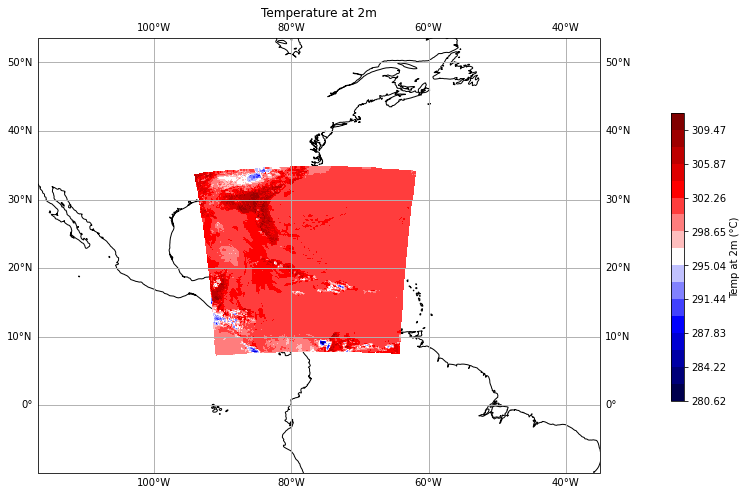

In [80]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m_nst_360_diff_span.plot(ax=ax,
              x='lon', y='lat',
              levels=18, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Temp at 2m (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_nest_dom.png')

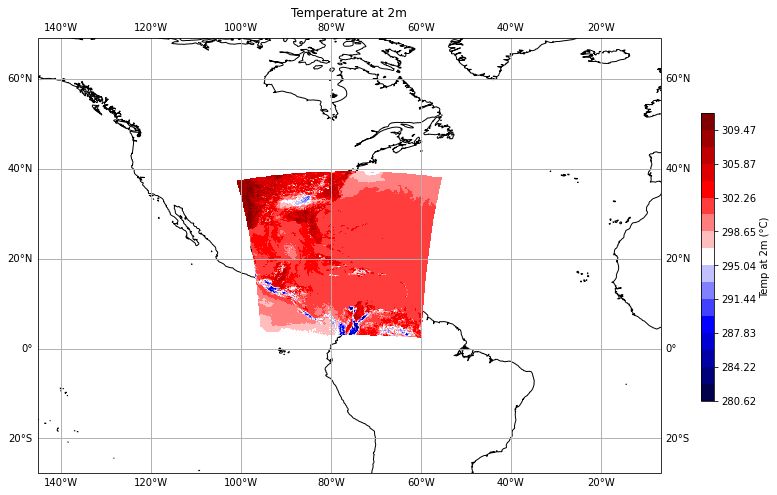

In [81]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m_nst_440.plot(ax=ax,
              x='lon', y='lat',
              levels=18, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Temp at 2m (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_nest_dom.png')

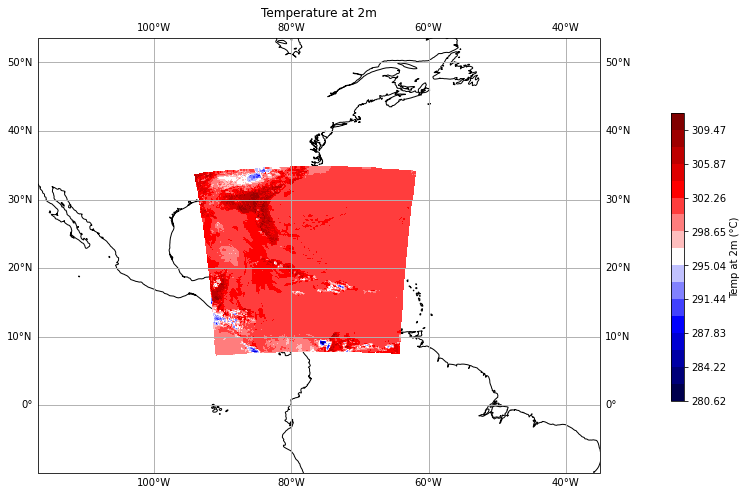

In [82]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m_nst_360.plot(ax=ax,
              x='lon', y='lat',
              levels=18, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Temp at 2m (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_nest_dom.png')

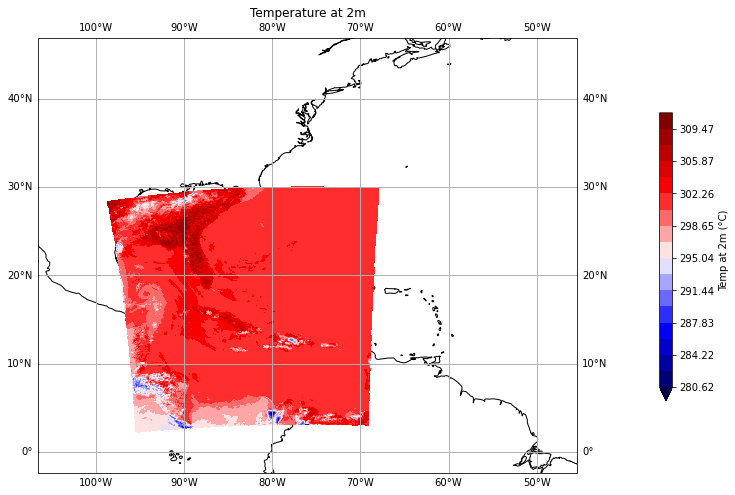

In [83]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp2m_nst_441_diff_span.plot(ax=ax,
              x='lon', y='lat',
              levels=18, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Temp at 2m (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_nest_dom.png')

##### Plotting 3D Variables

atmf003.nc


In [61]:
ds_atm=xr.open_dataset("atmf009.nc")
ds_atm.info()

xarray.Dataset {
dimensions:
	pfull = 81 ;
	phalf = 82 ;
	time = 1 ;
	grid_xt = 1396 ;
	grid_yt = 1396 ;

variables:
	float32 pfull(pfull) ;
		pfull:cartesian_axis = Z ;
		pfull:edges = phalf ;
		pfull:long_name = ref full pressure level ;
		pfull:positive = down ;
		pfull:units = mb ;
	float32 phalf(phalf) ;
		phalf:cartesian_axis = Z ;
		phalf:long_name = ref half pressure level ;
		phalf:positive = down ;
		phalf:units = mb ;
	object time(time) ;
		time:calendar_type = JULIAN ;
		time:cartesian_axis = T ;
		time:long_name = time ;
	float64 grid_xt(grid_xt) ;
		grid_xt:cartesian_axis = X ;
		grid_xt:long_name = rotated T-cell longiitude ;
		grid_xt:units = degrees ;
	float64 grid_yt(grid_yt) ;
		grid_yt:cartesian_axis = Y ;
		grid_yt:long_name = rotated T-cell latiitude ;
		grid_yt:units = degrees ;
	|S20 time_iso(time) ;
		time_iso:long_name = valid time ;
		time_iso:description = ISO 8601 datetime string ;
	float64 lon(grid_yt, grid_xt) ;
		lon:long_name = T-cell longitude ;
		lon:

In [62]:
def loadData_assingCord_atm(file,pfull,var):
    '''
    This function will load netcdf data using xarray
    and extract a given varaible and also assign physical 
    coordinate to the extacted variable 
    
    '''
    ds=xr.open_dataset(file)
    var=ds[var][0,pfull :, :]
    #assign physical coordinate
    lon=ds.lon
    lat=ds.lon
    var=var.assign_coords({'lat': lat, 'lon': lon})
    return ds,var

In [63]:
loadData_assingCord_atm("atmf009.nc",42,"tmp")

(<xarray.Dataset>
 Dimensions:     (pfull: 81, phalf: 82, time: 1, grid_xt: 1396, grid_yt: 1396)
 Coordinates:
   * pfull       (pfull) float32 3.083 5.873 9.424 14.23 ... 993.4 996.2 998.8
   * phalf       (phalf) float32 2.0 4.5 7.5 11.65 ... 991.9 994.8 997.5 1e+03
   * time        (time) object 2020-08-25 21:00:00
   * grid_xt     (grid_xt) float64 -41.85 -41.79 -41.73 ... 41.73 41.79 41.85
   * grid_yt     (grid_yt) float64 -41.85 -41.79 -41.73 ... 41.73 41.79 41.85
 Data variables: (12/32)
     time_iso    (time) |S20 ...
     lon         (grid_yt, grid_xt) float64 ...
     lat         (grid_yt, grid_xt) float64 ...
     cld_amt     (time, pfull, grid_yt, grid_xt) float32 ...
     clwmr       (time, pfull, grid_yt, grid_xt) float32 ...
     delz        (time, pfull, grid_yt, grid_xt) float32 ...
     ...          ...
     uhmin03     (time, grid_yt, grid_xt) float32 ...
     uhmin25     (time, grid_yt, grid_xt) float32 ...
     upvvelmax   (time, grid_yt, grid_xt) float32 ...
   

#### Plotting 3D Varaibles using cartopy coarse domain HAFS

In [64]:
ds_atm,tmp=loadData_assingCord_atm("atmf009.nc",42,"tmp")

In [65]:
tmp=ds_atm['tmp'][0,42, :, :]
lon=ds_atm.lon
lat=ds_atm.lat
tmp = tmp.assign_coords({'lat': lat, 'lon': lon})
tmp.coords['pfull']

<xarray.DataArray 'pfull' ()>
array(558.44696, dtype=float32)
Coordinates:
    pfull    float32 558.4
    time     object 2020-08-25 21:00:00
Attributes:
    cartesian_axis:  Z
    edges:           phalf
    long_name:       ref full pressure level
    positive:        down
    units:           mb

In [66]:
tmin=np.min(tmp)
tmax=np.max(tmp)
tmin,tmax

(<xarray.DataArray 'tmp' ()>
 array(244.06610107)
 Coordinates:
     pfull    float32 558.4
     time     object 2020-08-25 21:00:00,
 <xarray.DataArray 'tmp' ()>
 array(280.82980347)
 Coordinates:
     pfull    float32 558.4
     time     object 2020-08-25 21:00:00)

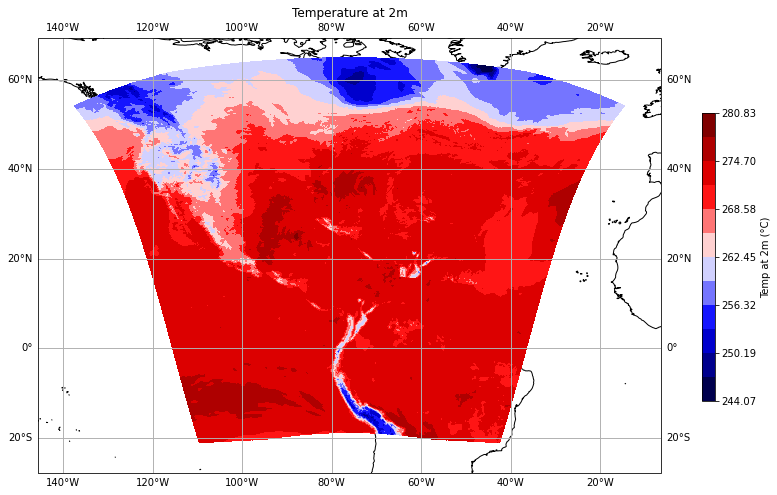

In [67]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp.plot(ax=ax,
              x='lon', y='lat',
              levels=13, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Temp at 2m (°C)')
ax.gridlines(draw_labels=True)
plt.savefig('temprature@2m_nest_dom.png')

#### Loop over all pressure levels (Full)

In [68]:
pl=ds_atm.pfull
plev=int(pl.values.tolist()[0])

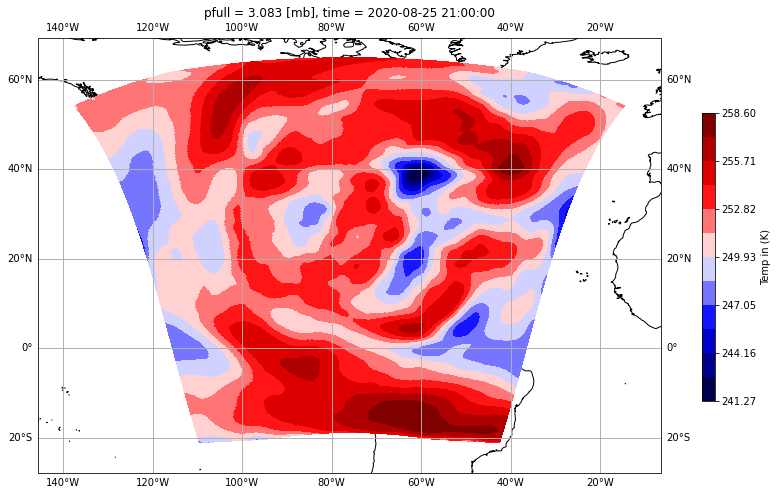

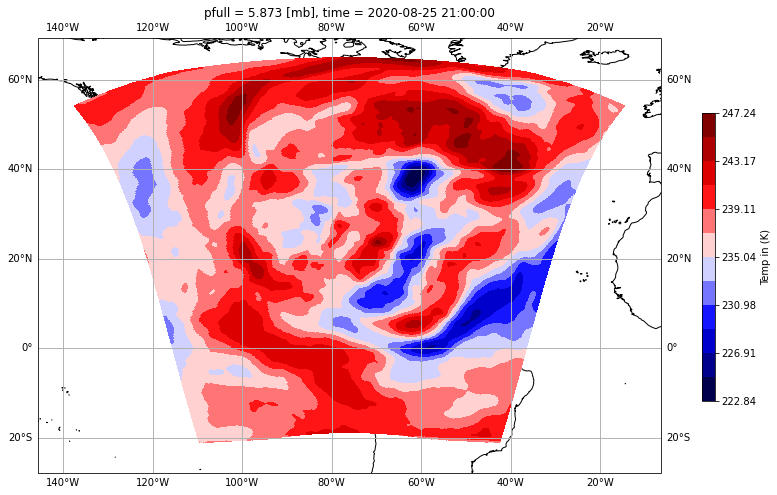

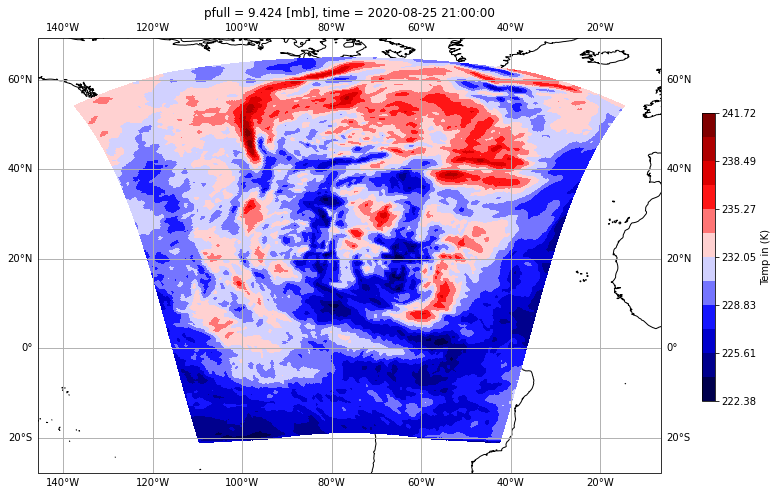

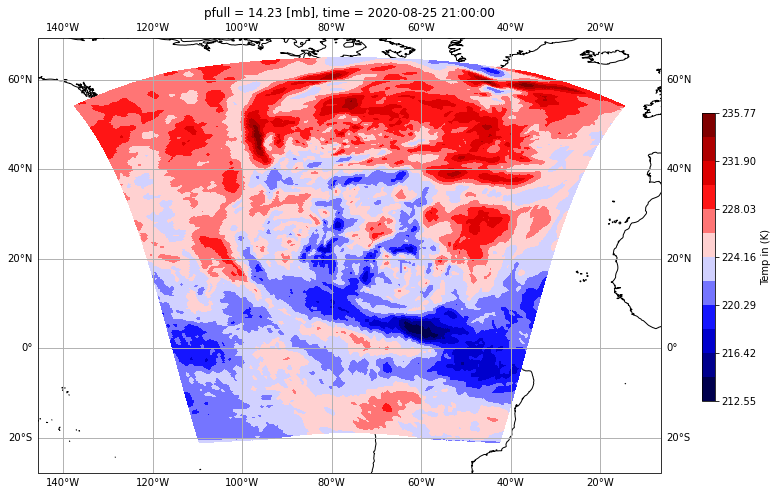

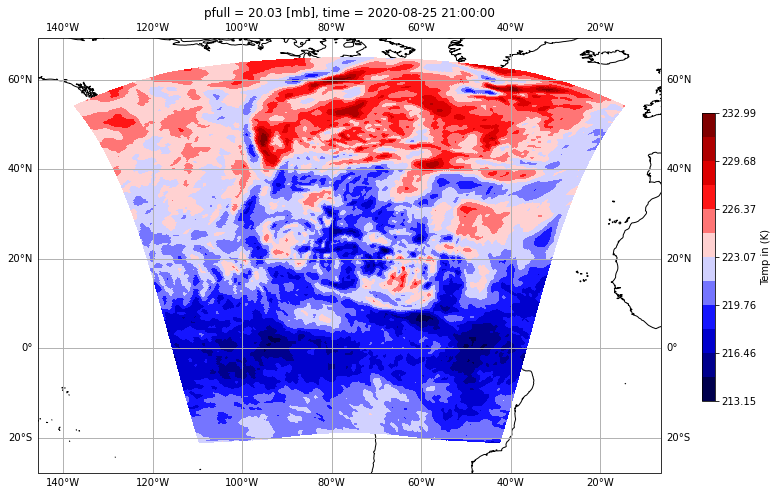

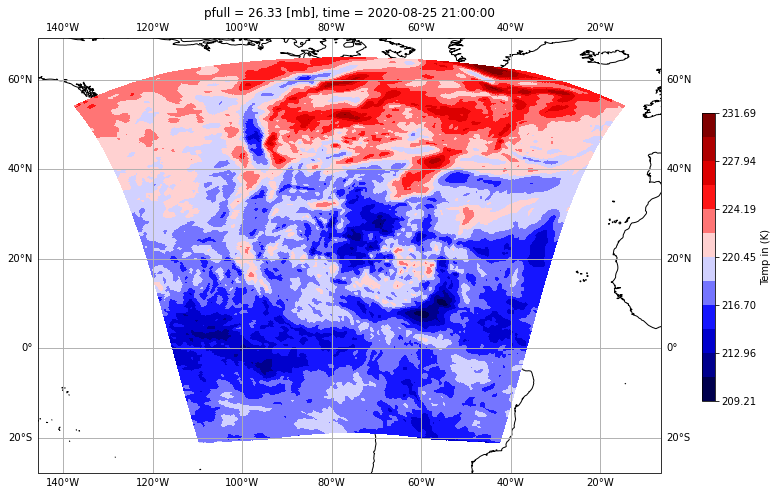

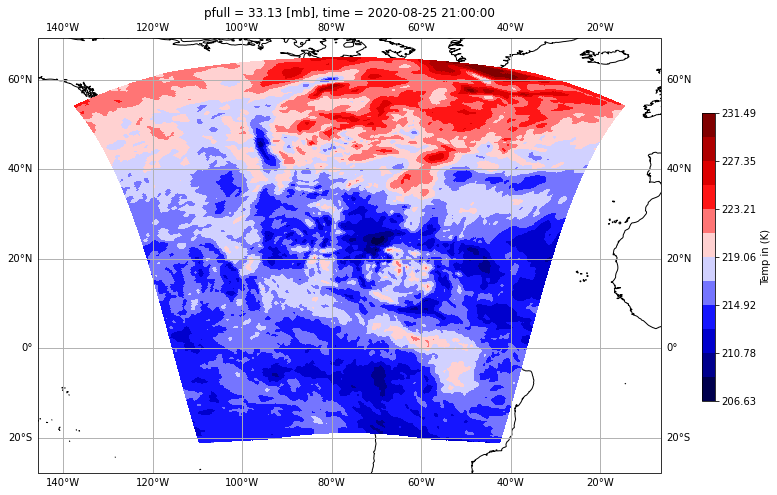

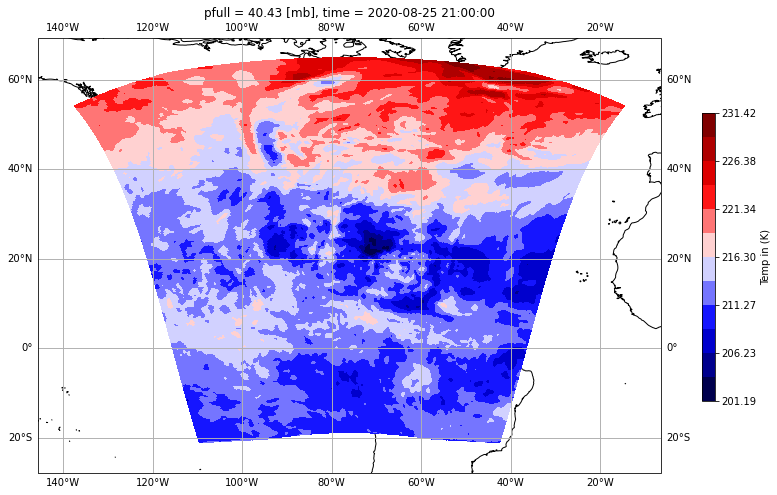

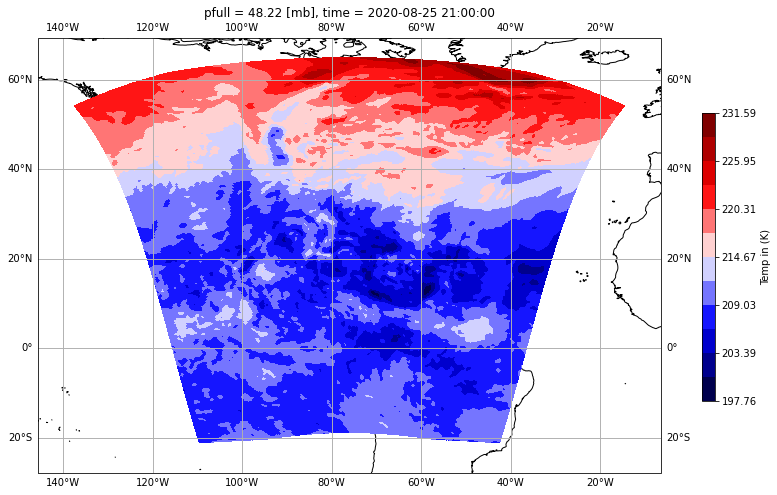

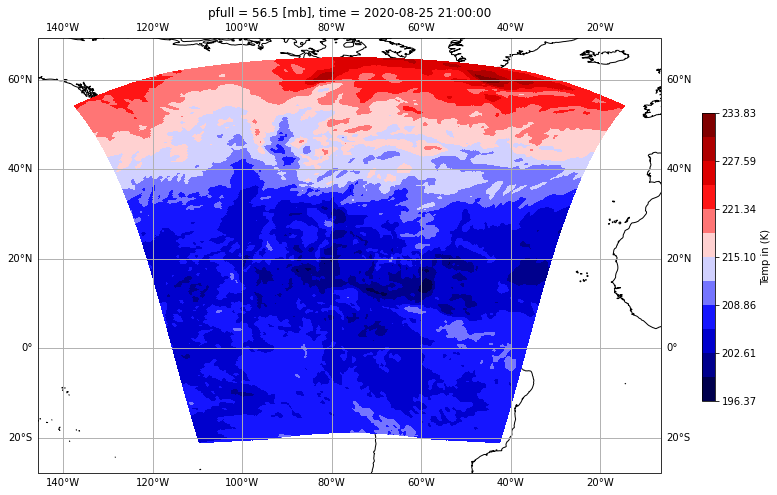

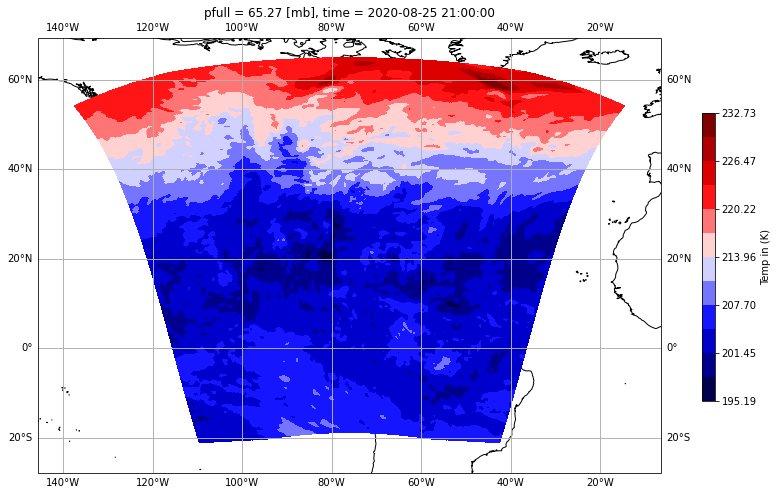

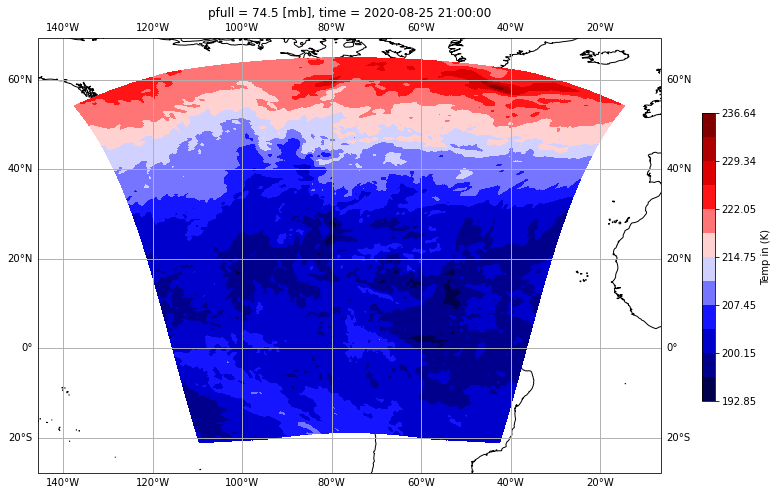

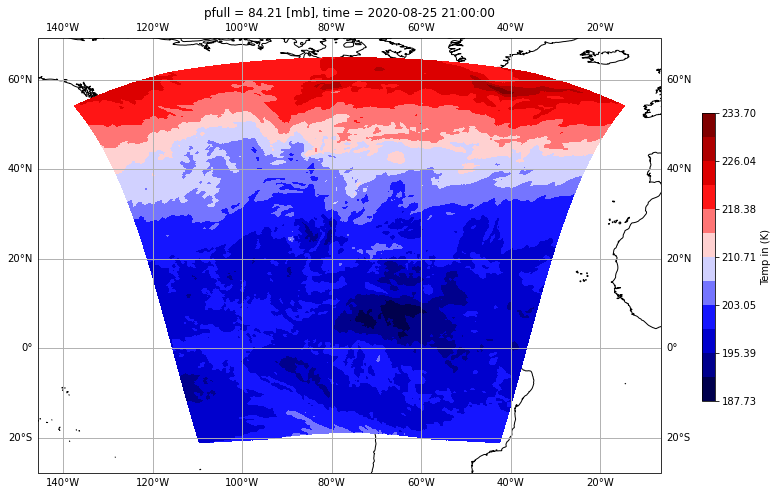

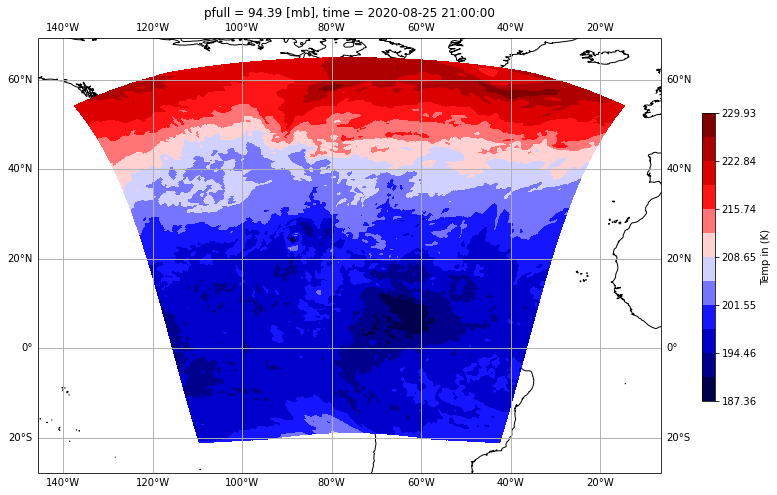

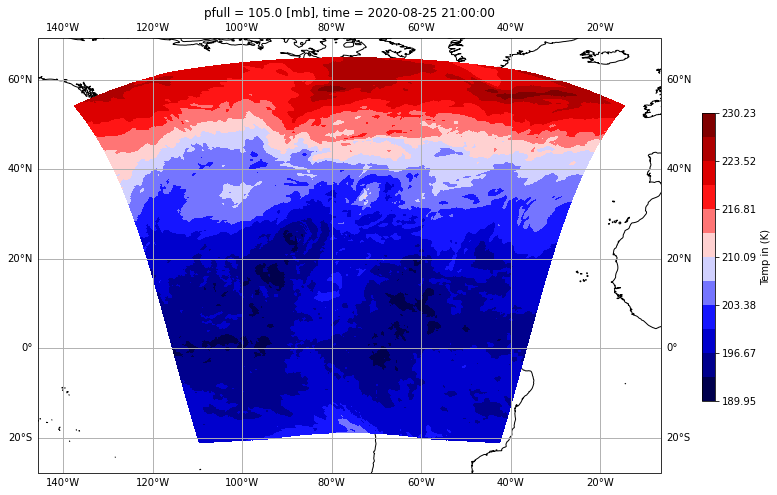

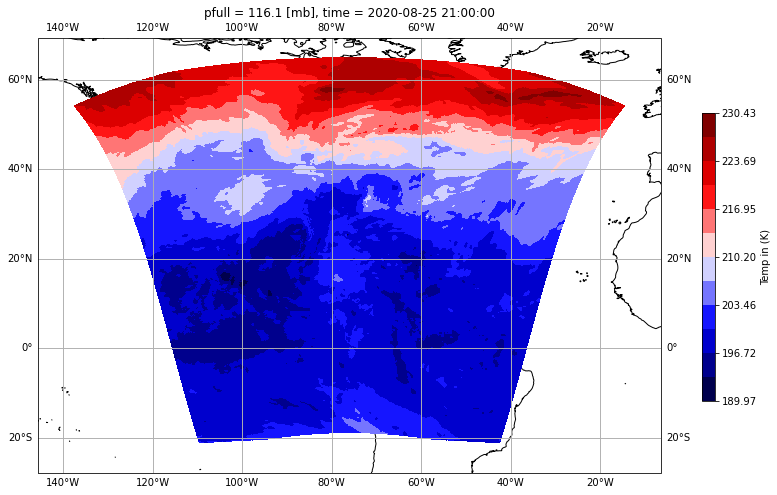

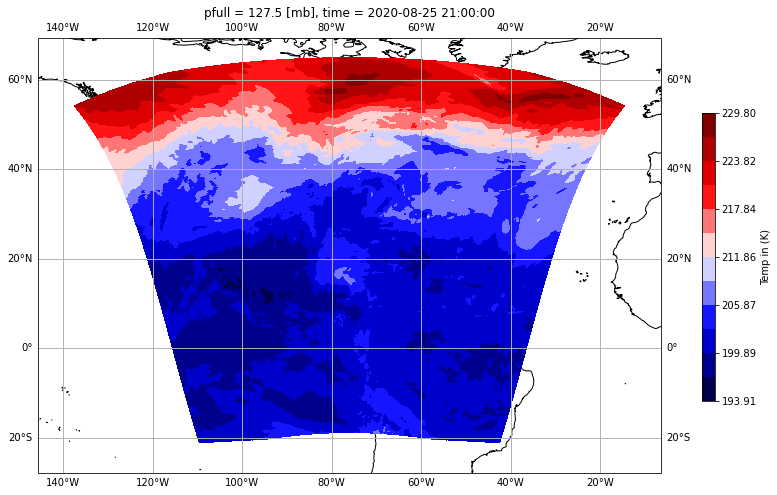

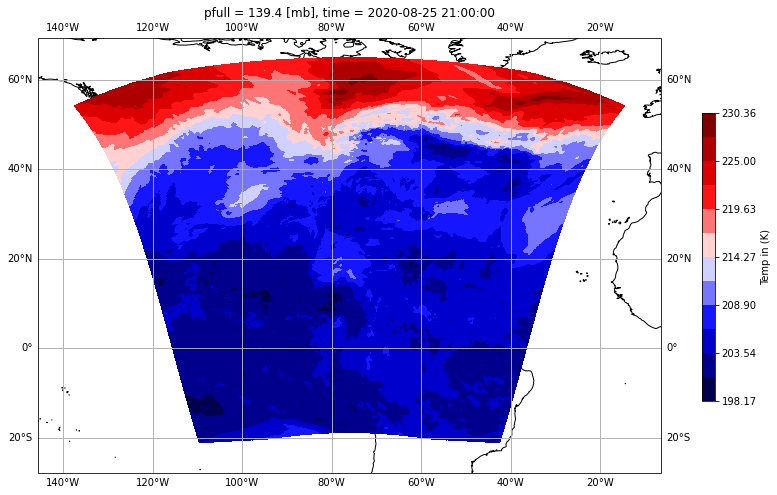

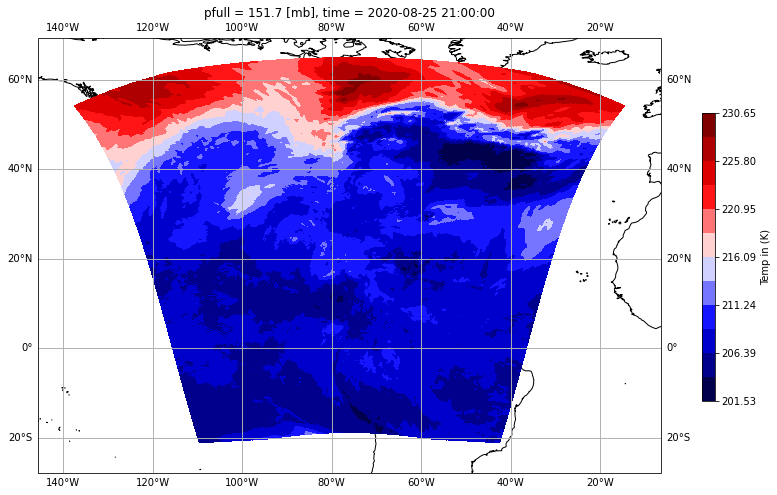

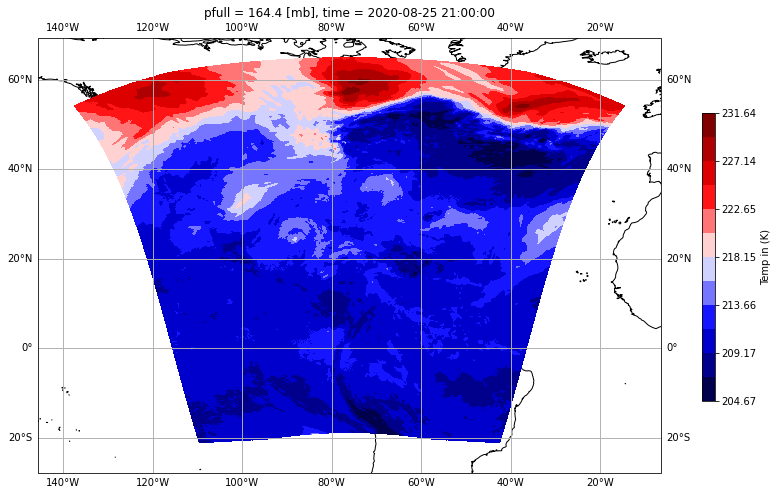

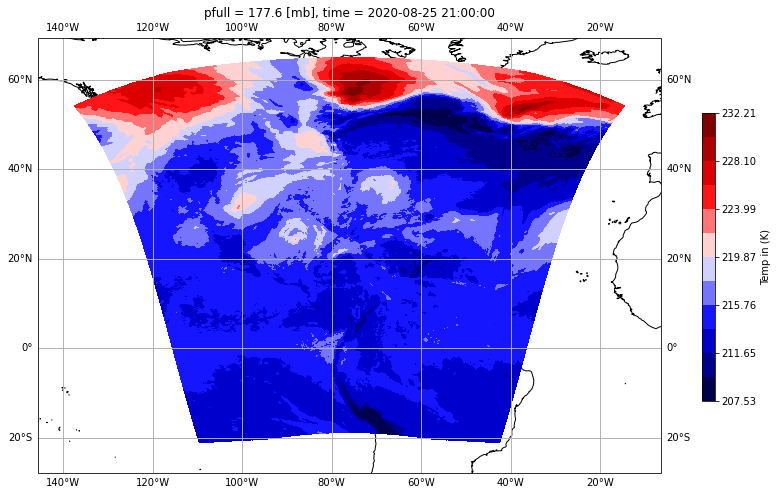

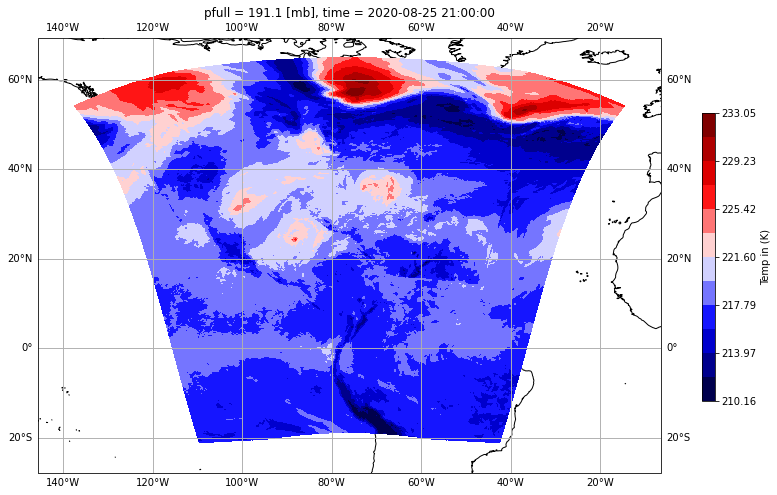

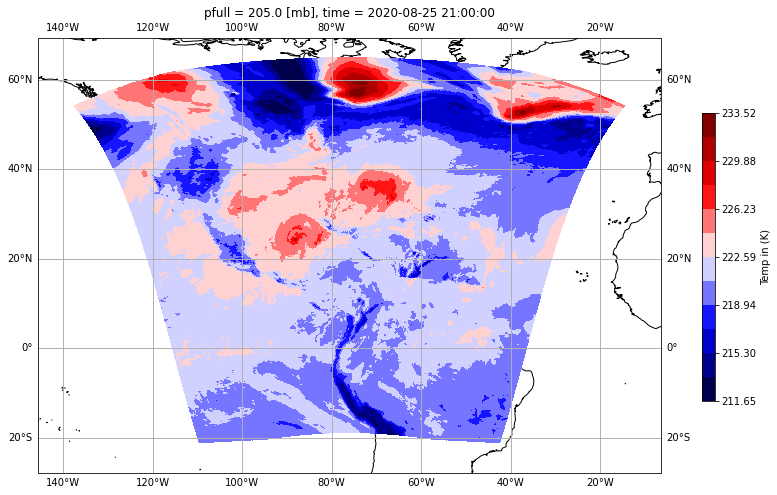

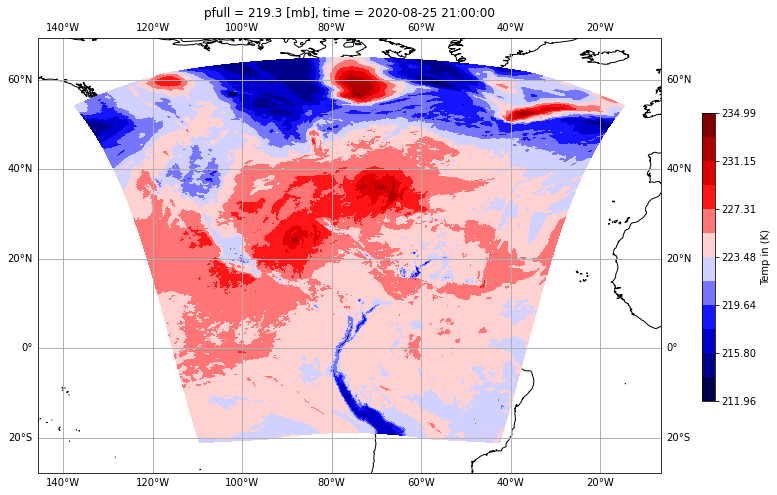

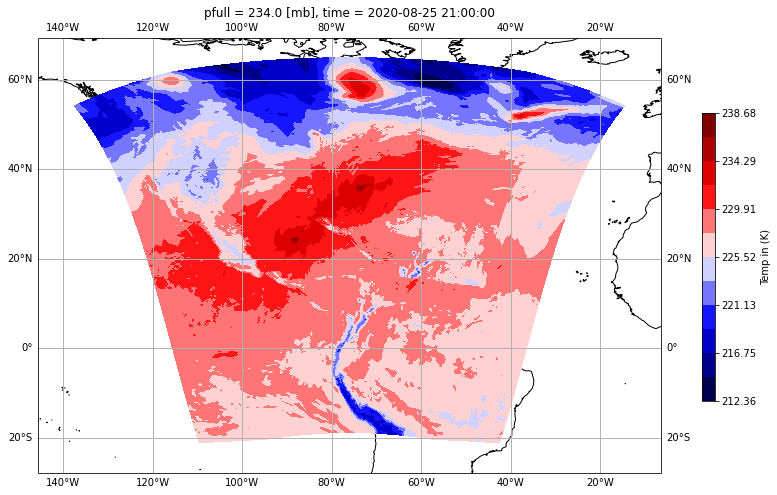

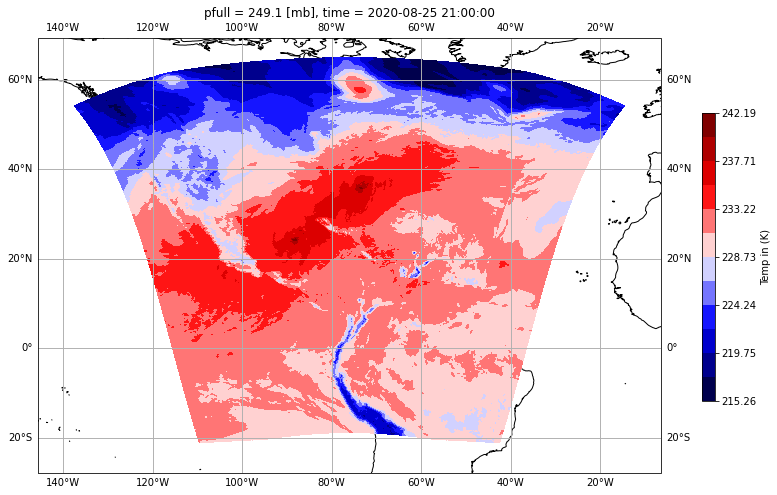

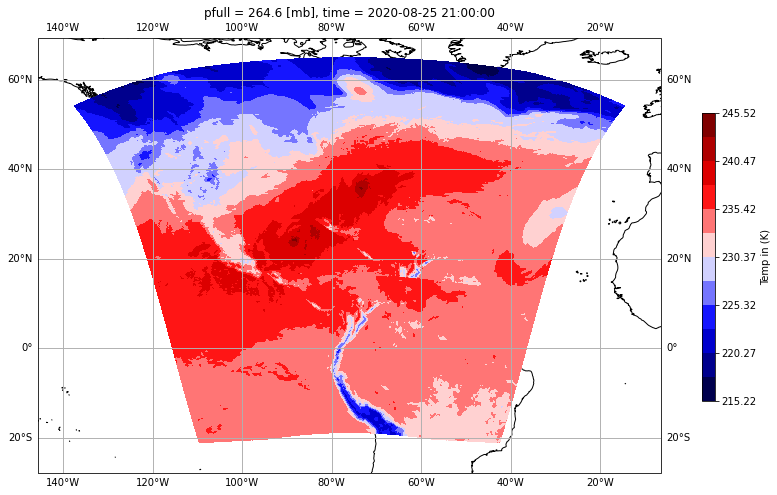

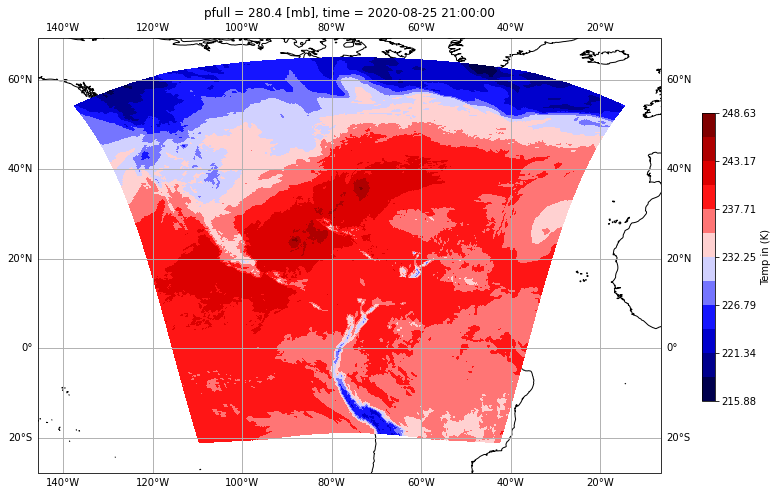

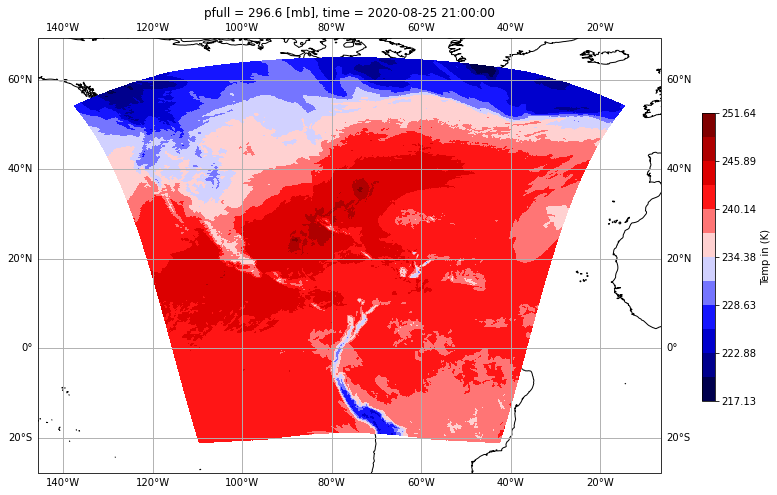

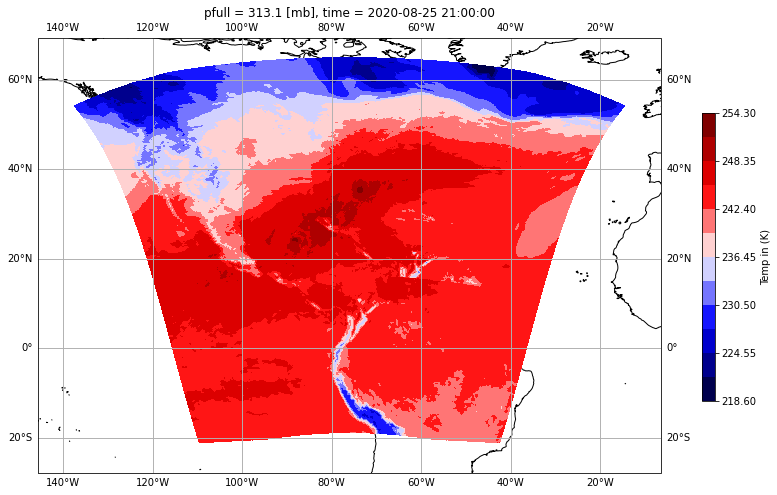

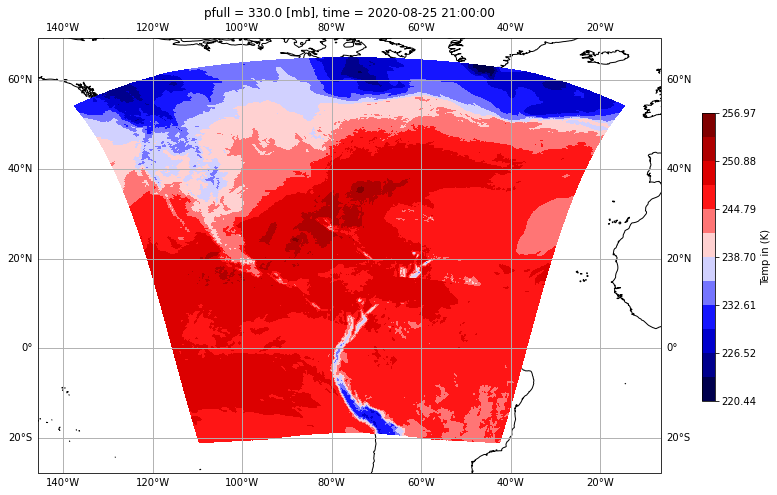

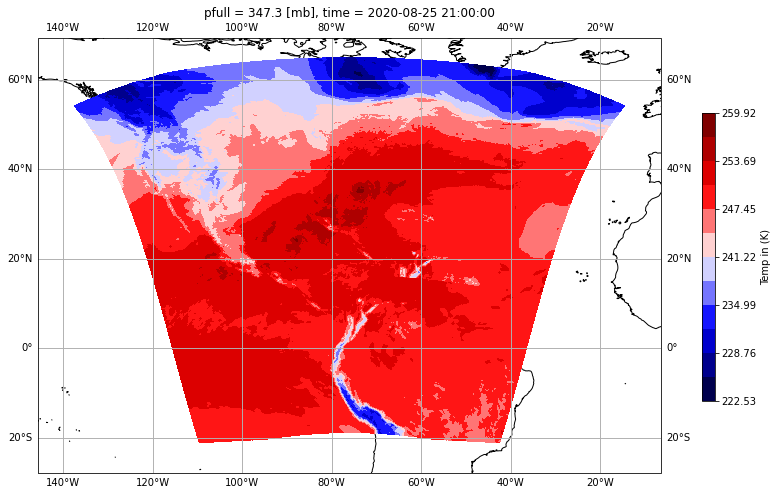

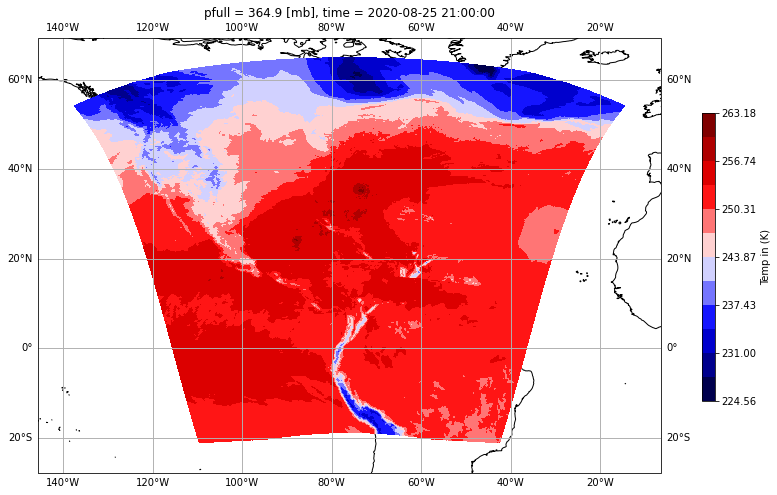

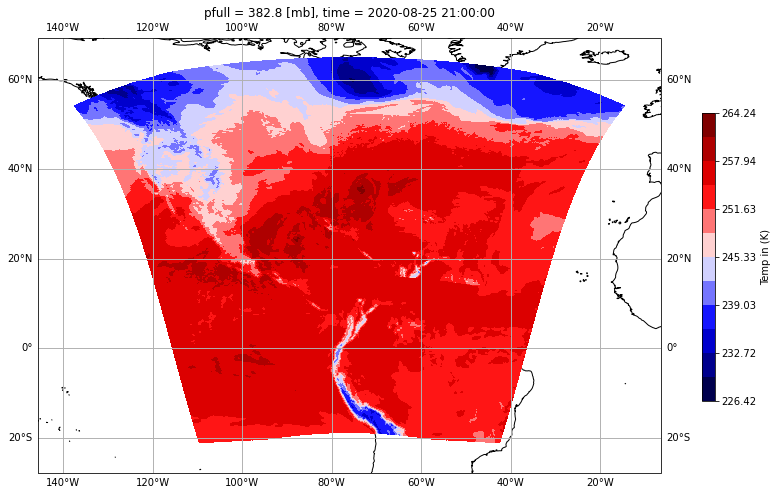

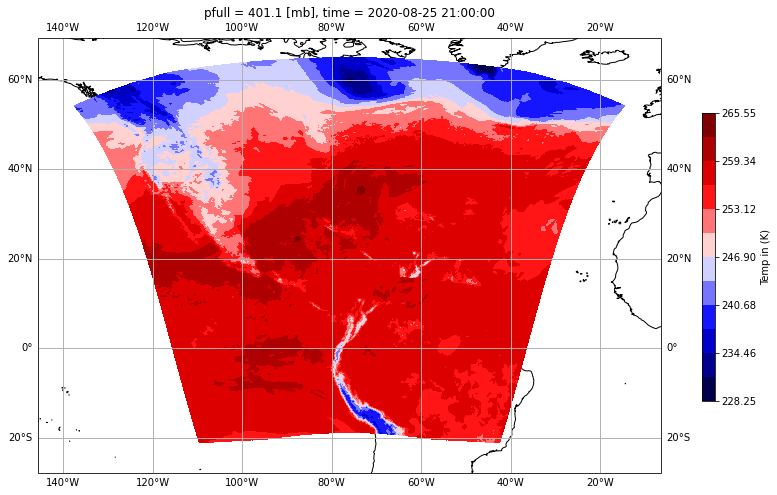

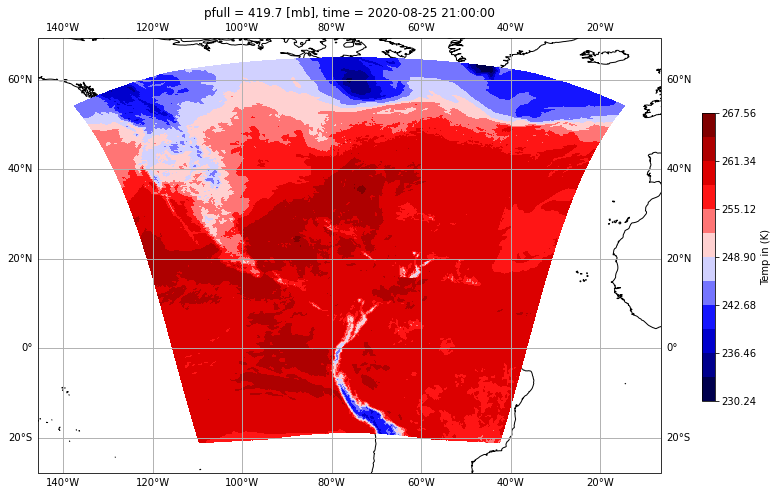

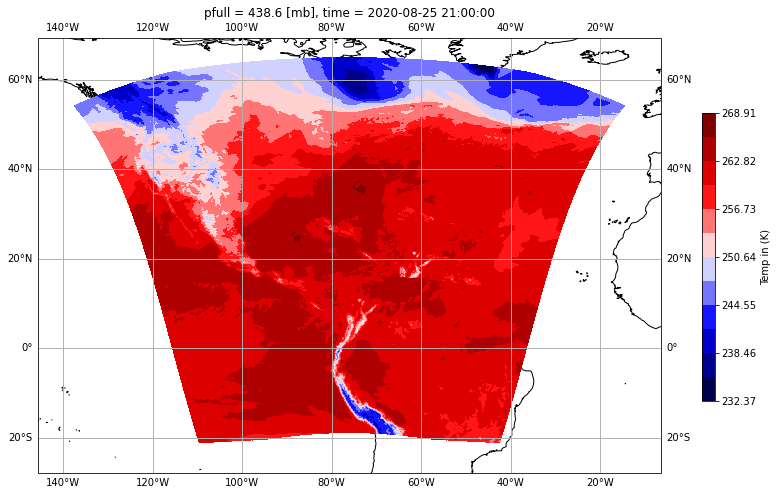

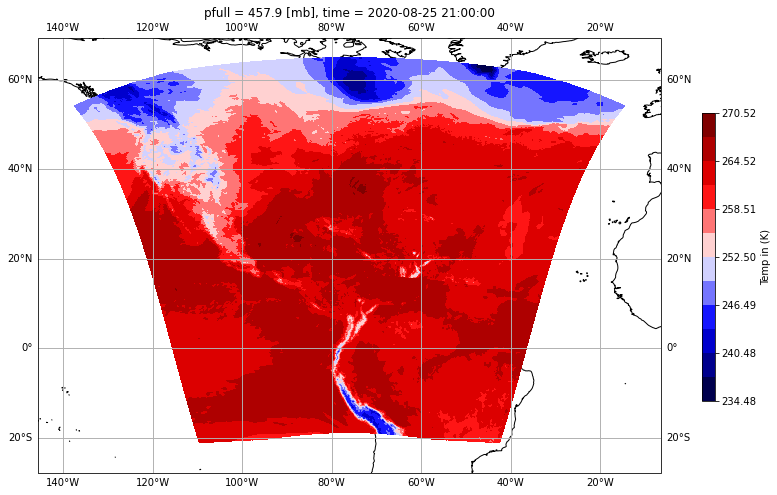

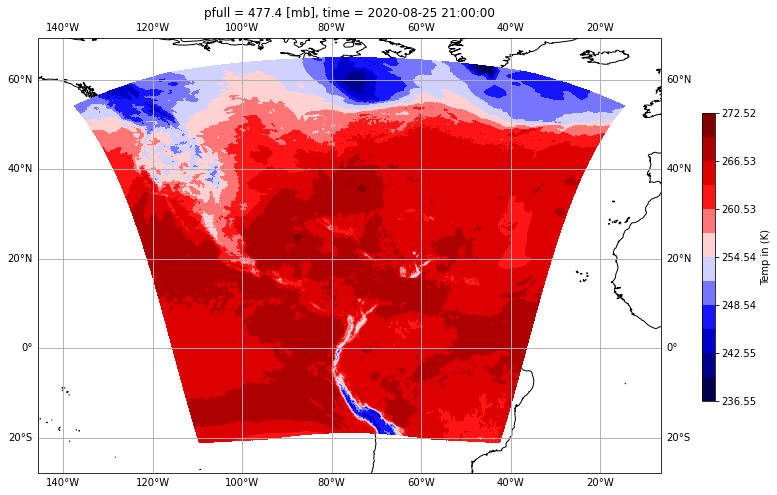

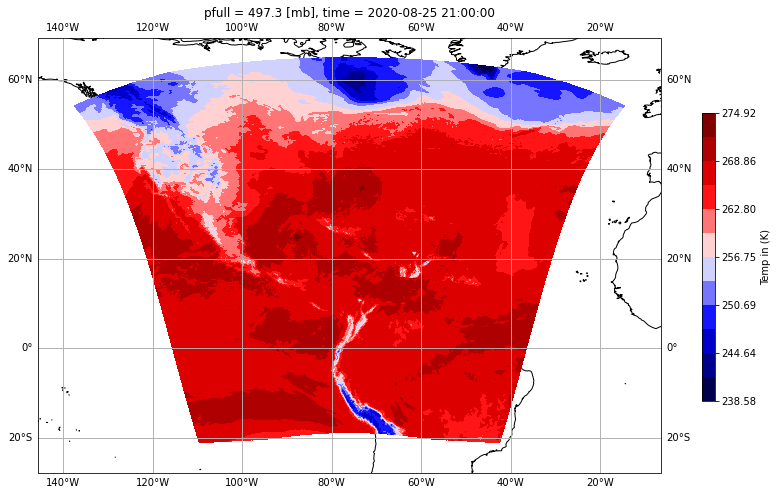

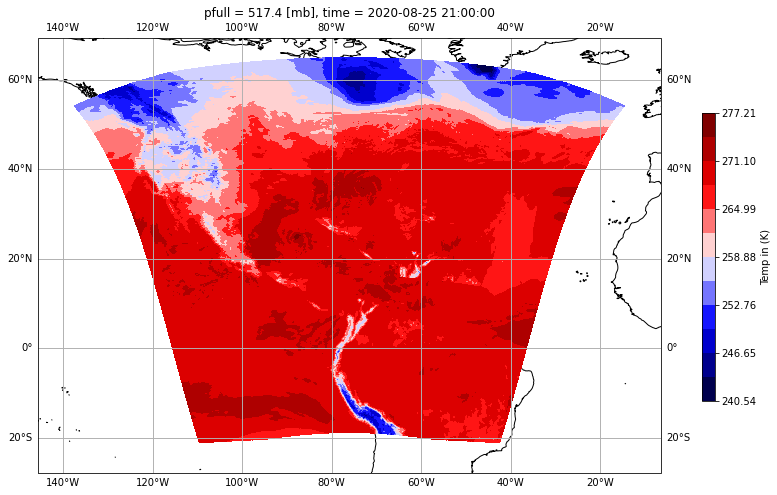

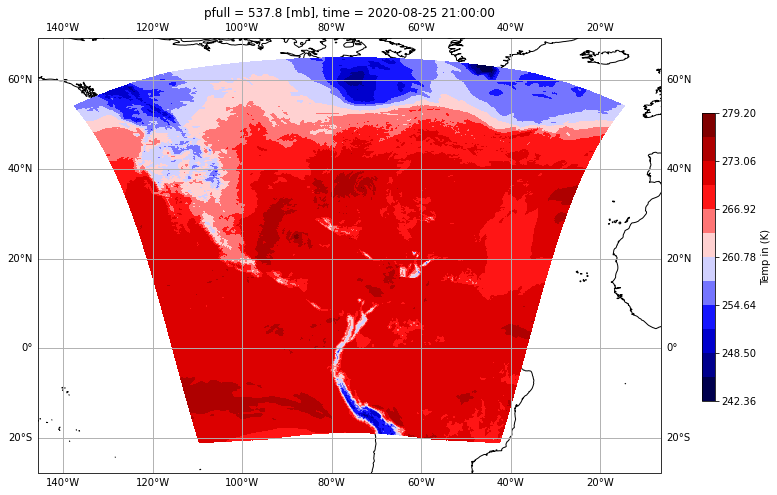

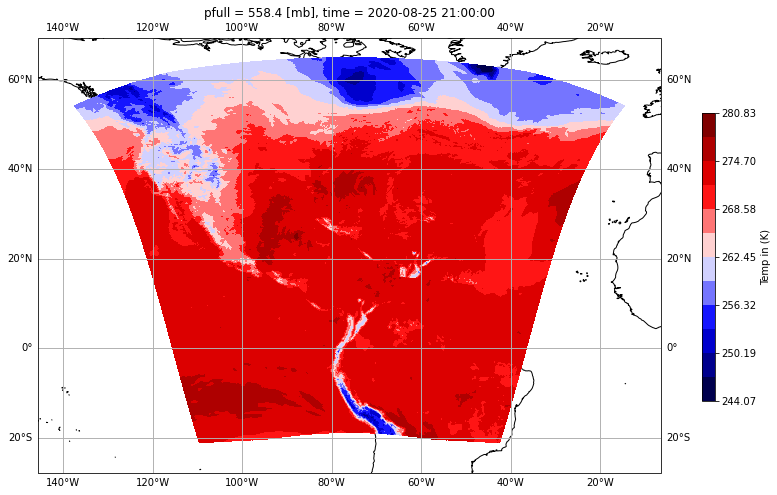

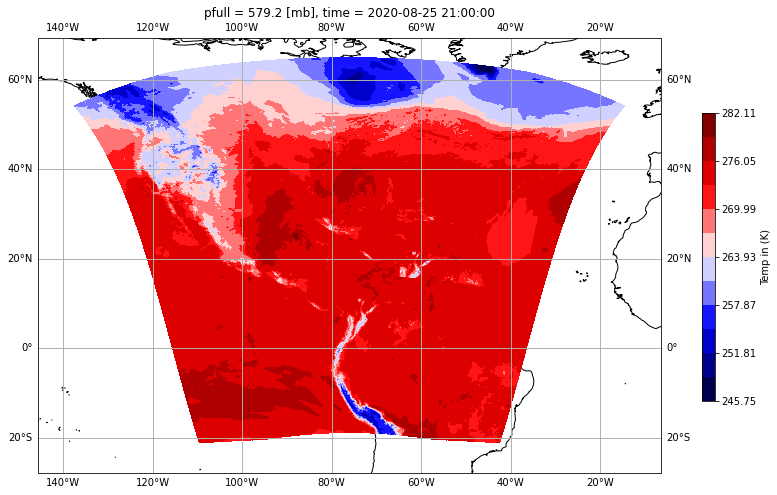

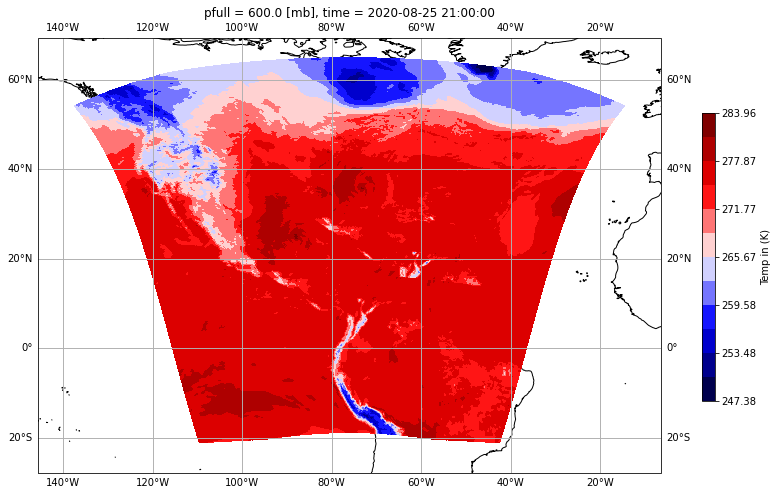

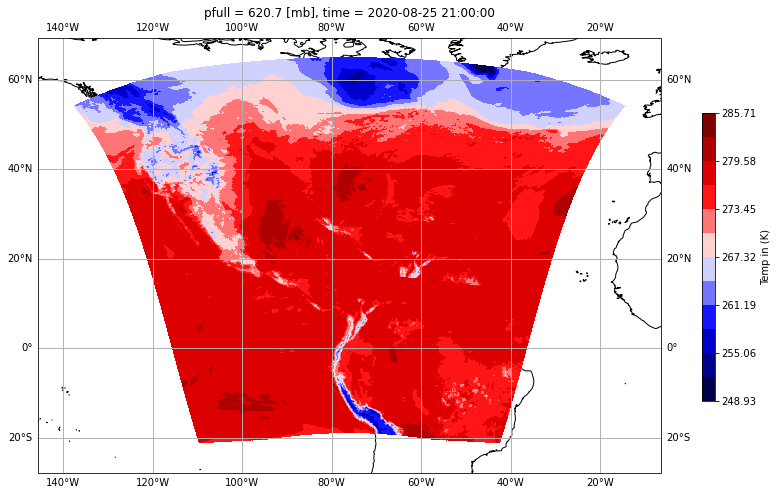

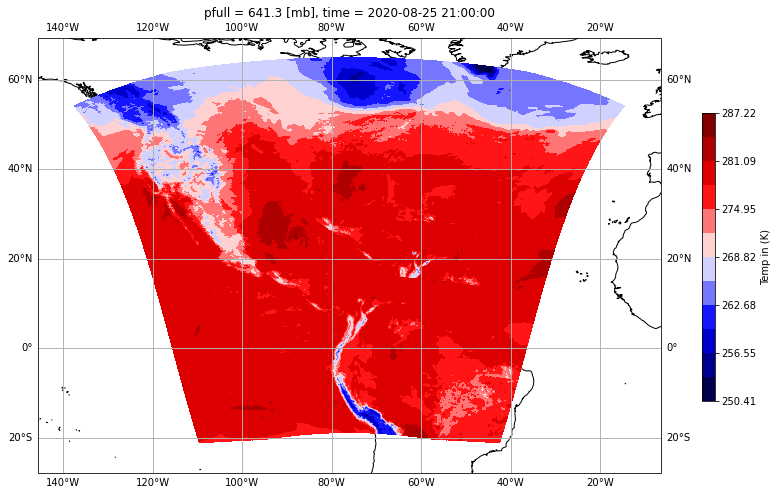

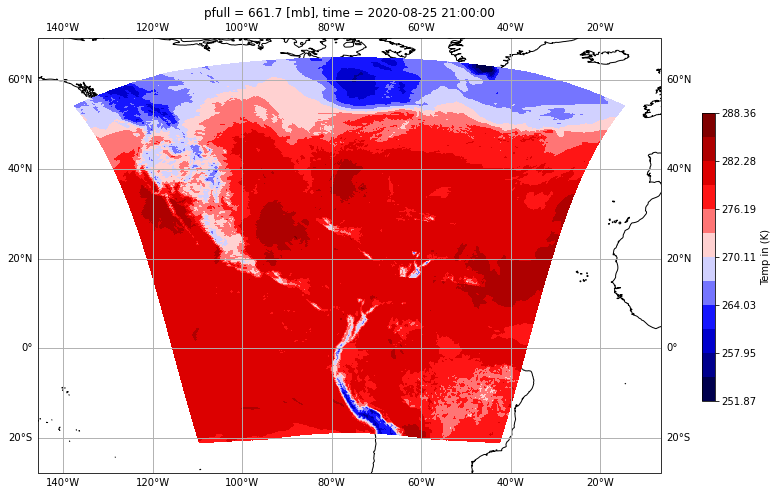

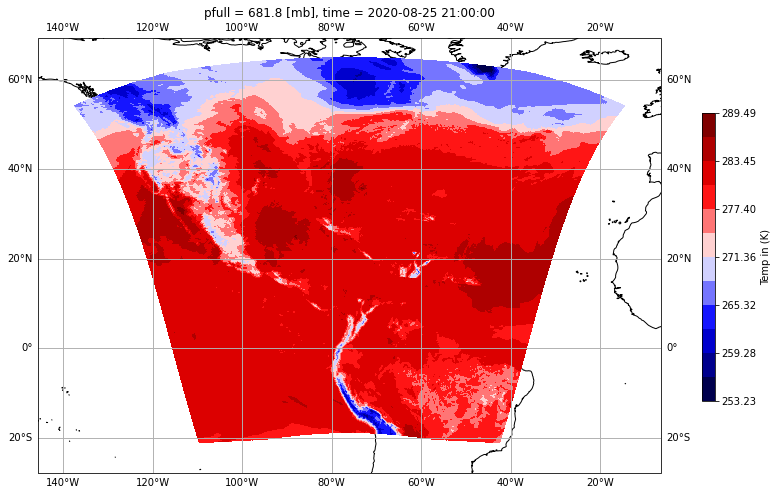

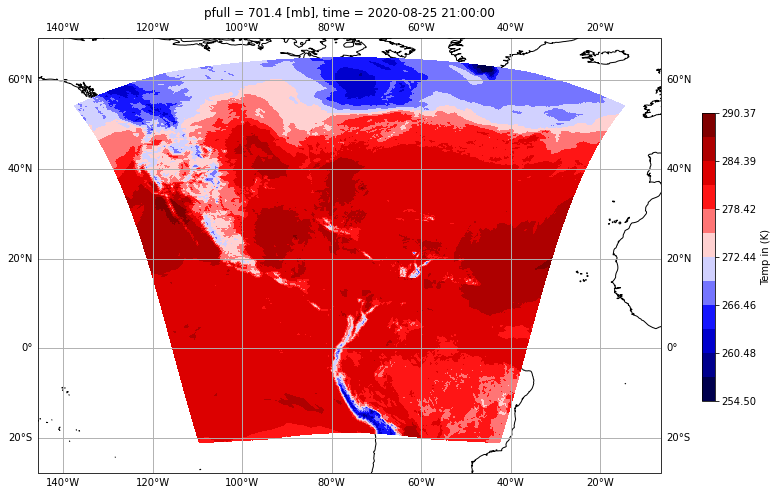

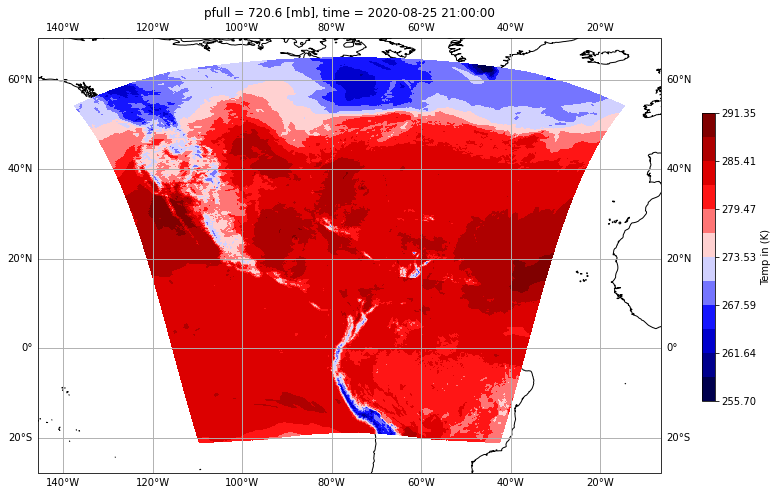

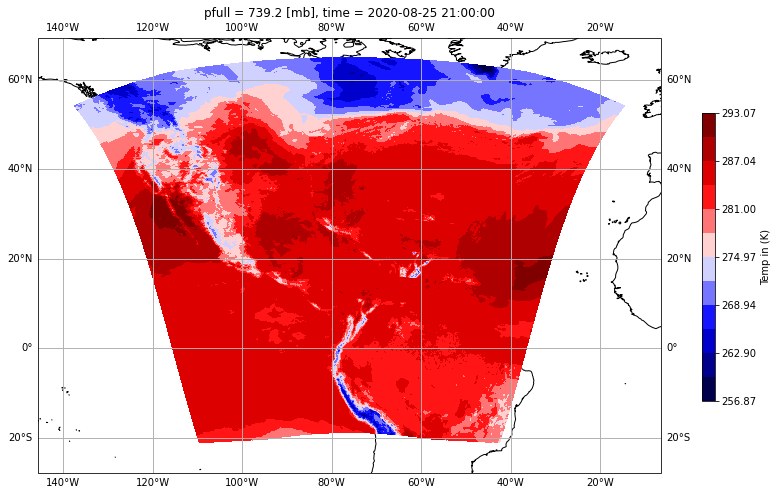

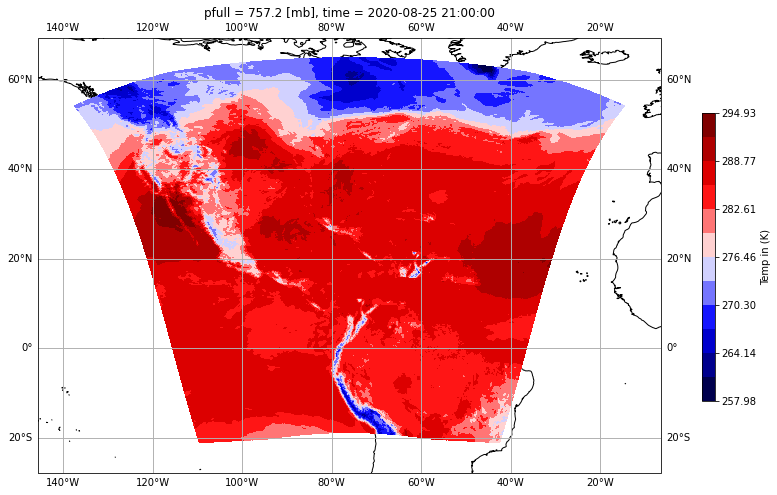

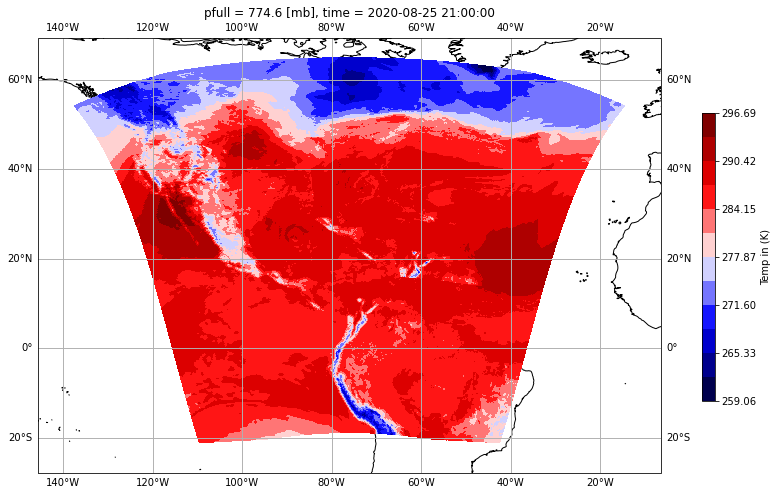

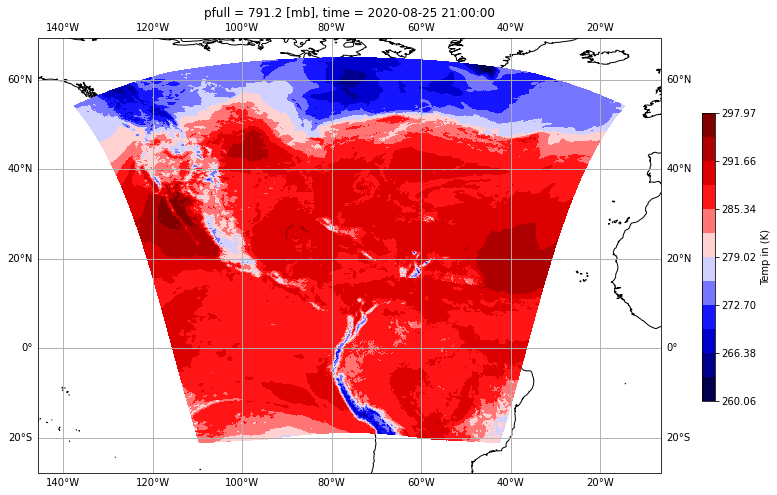

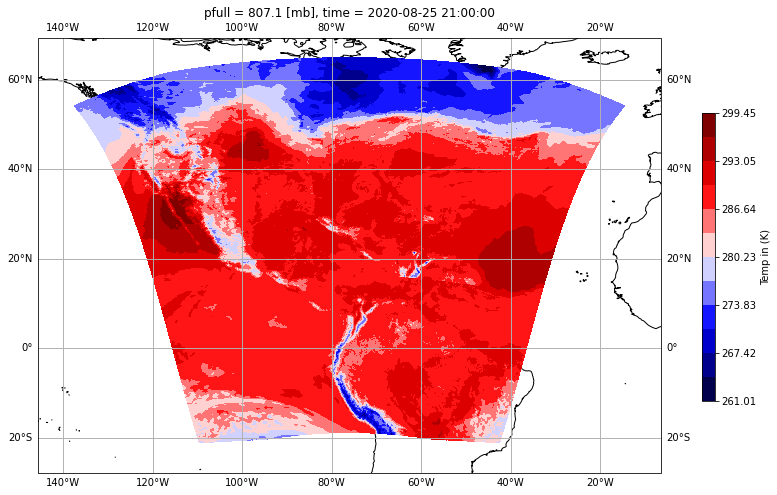

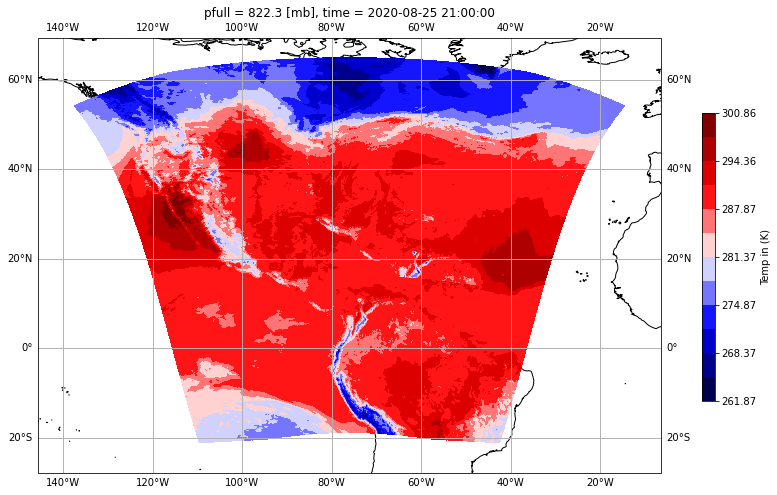

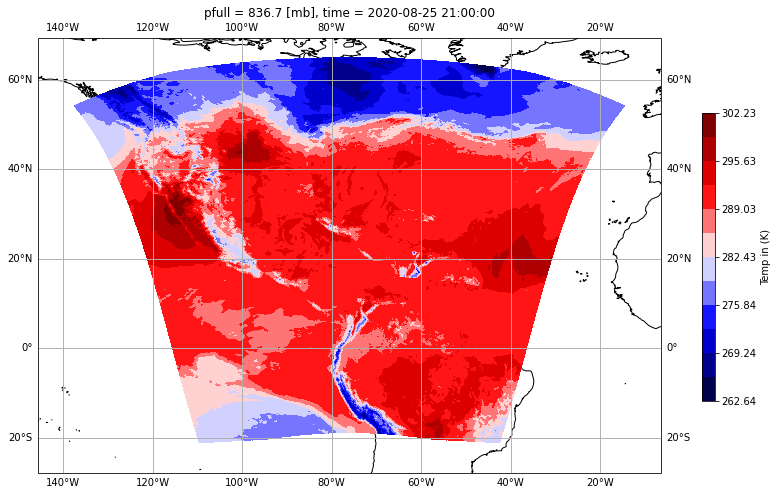

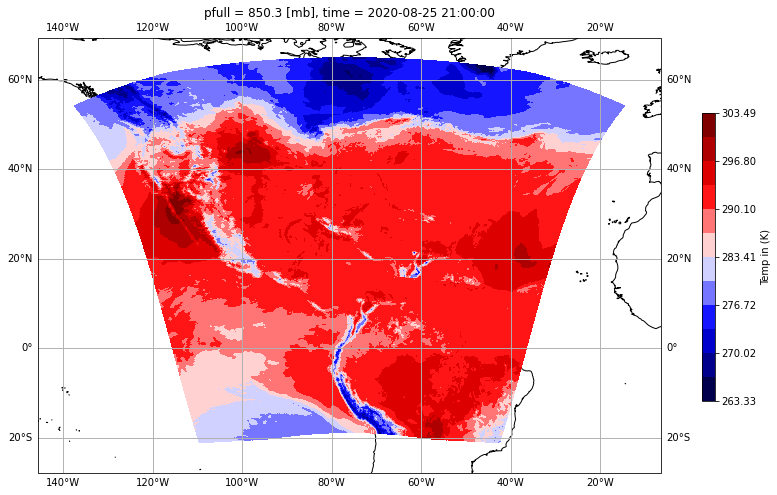

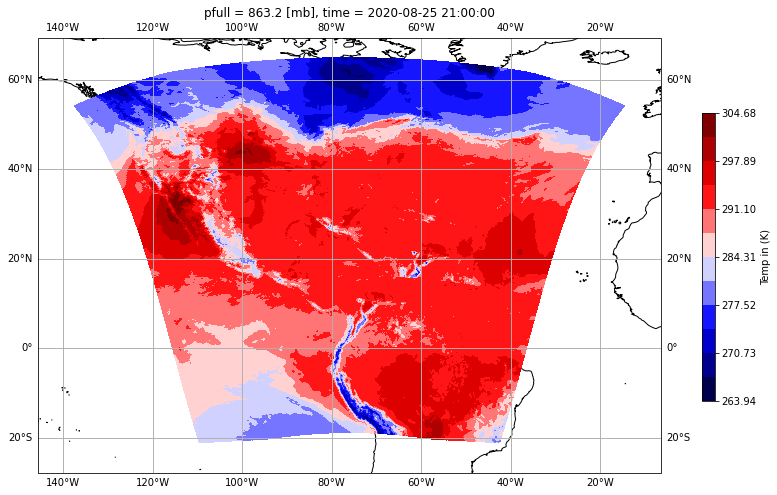

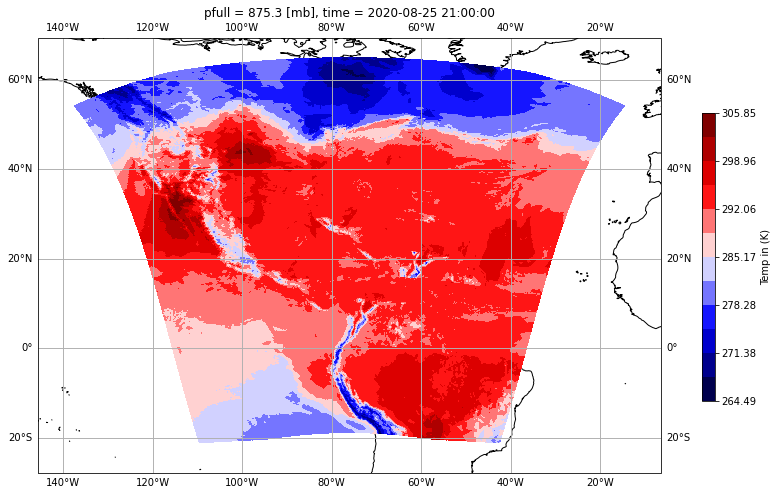

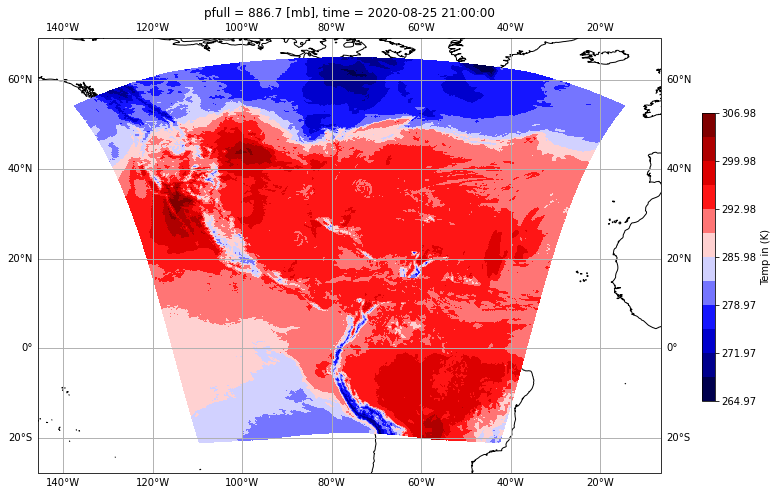

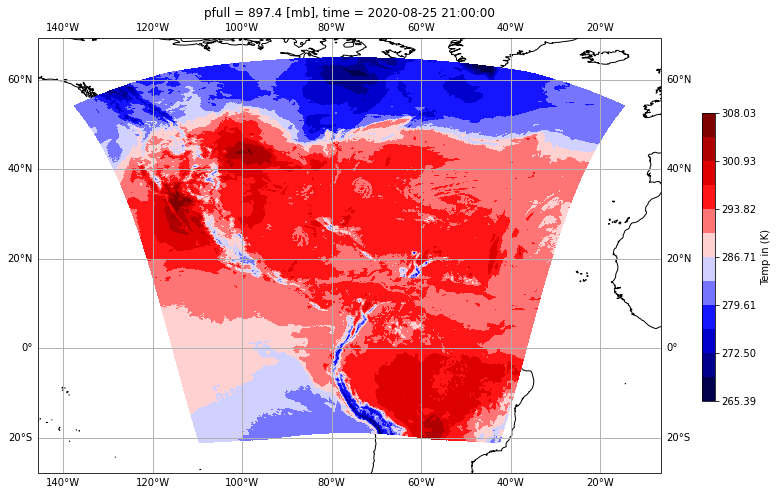

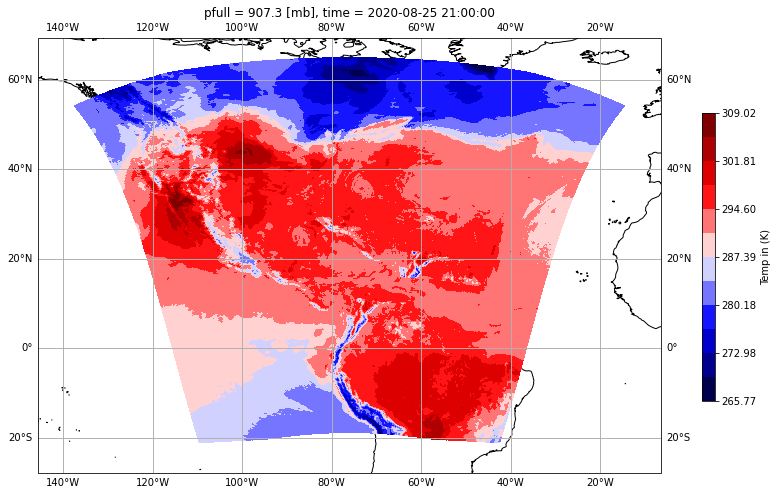

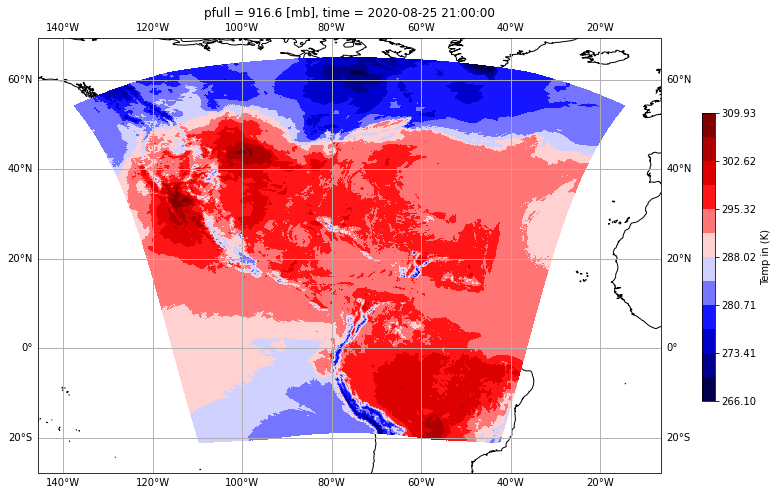

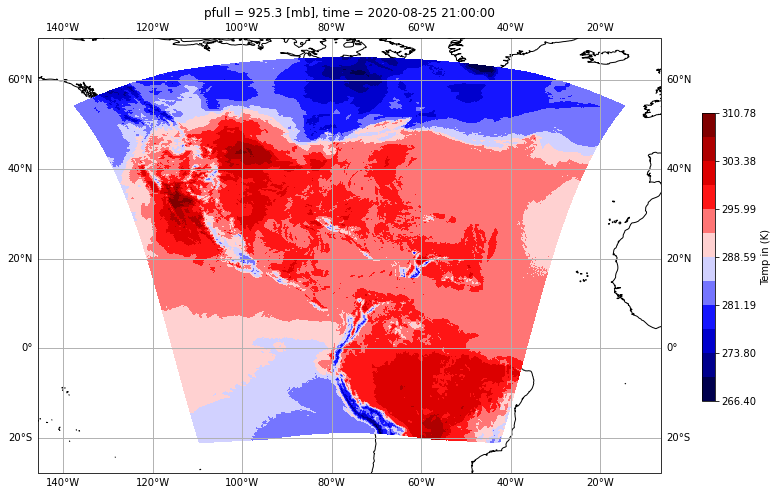

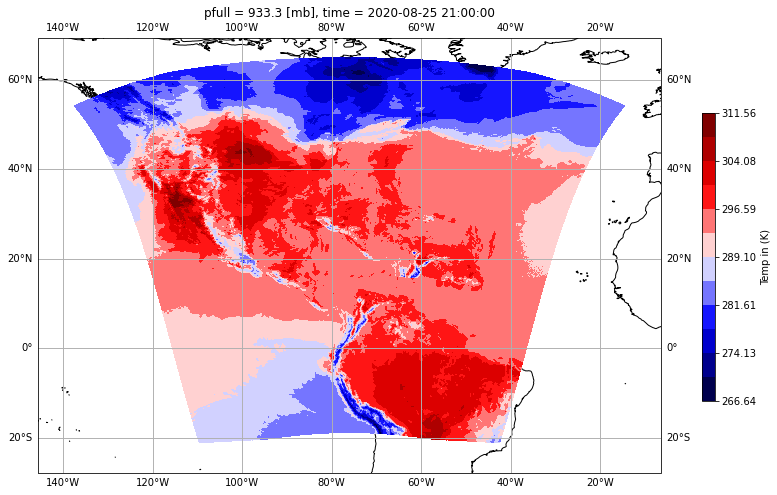

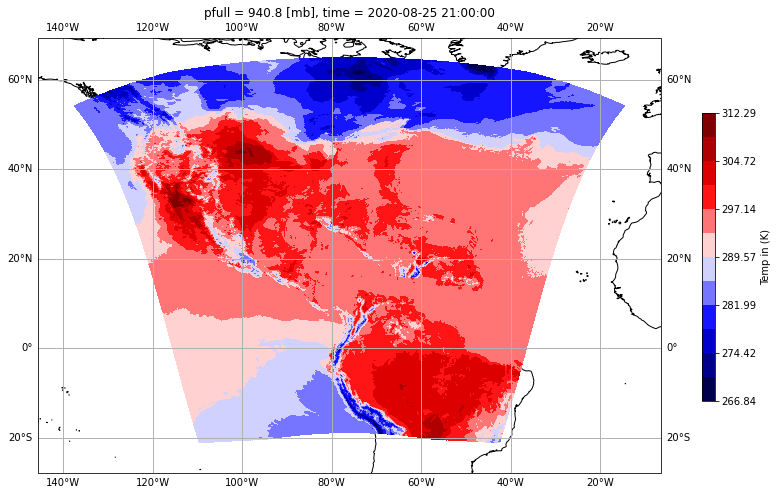

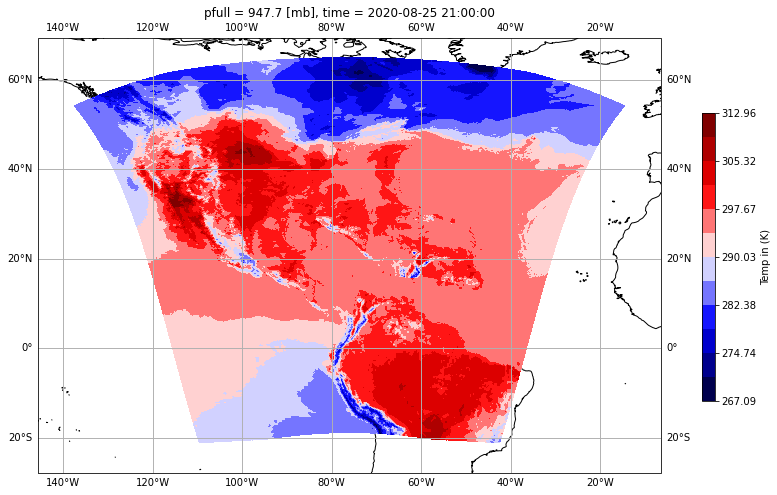

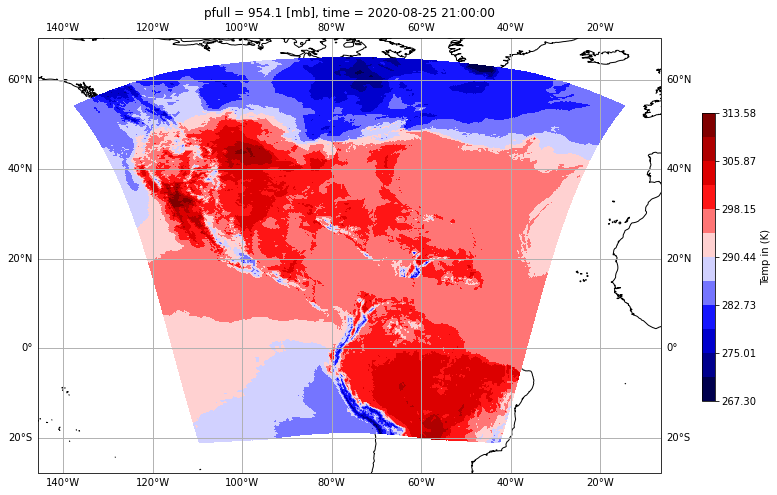

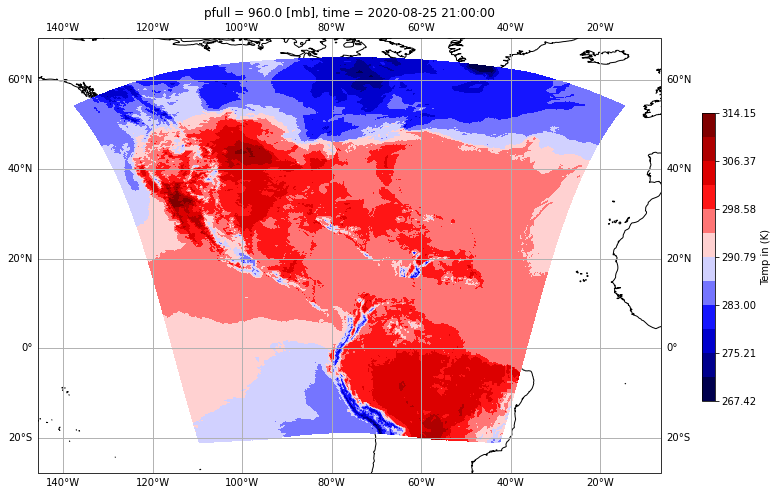

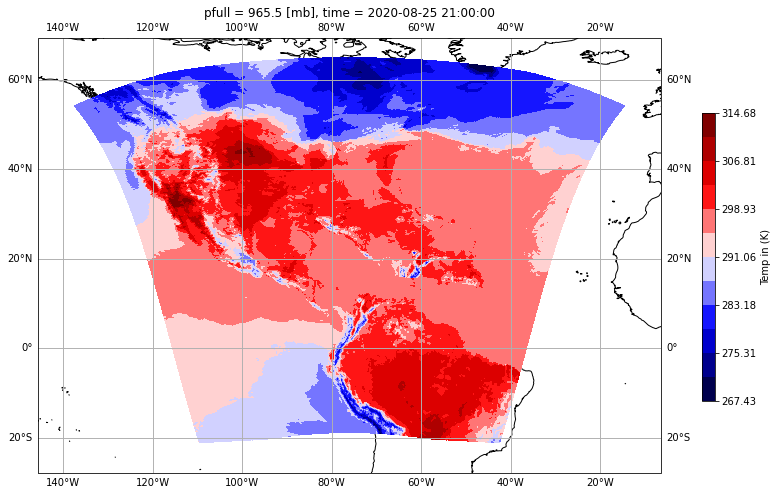

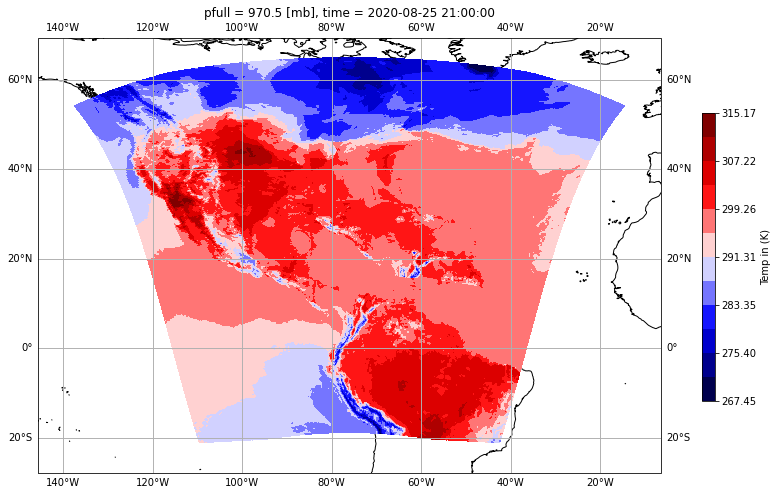

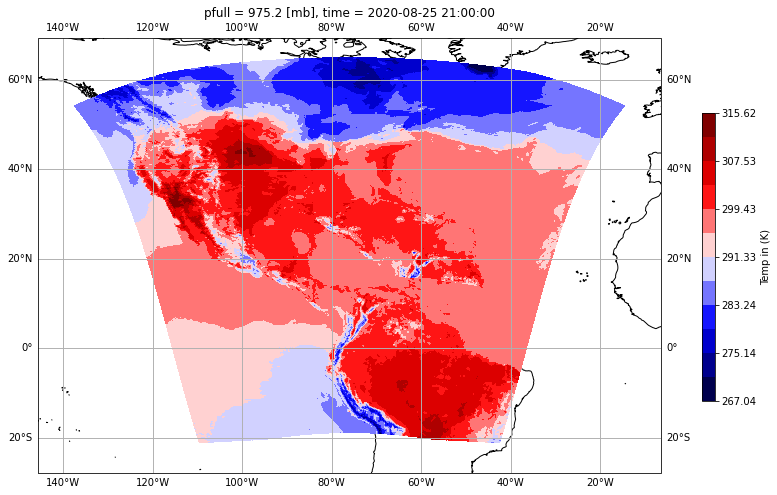

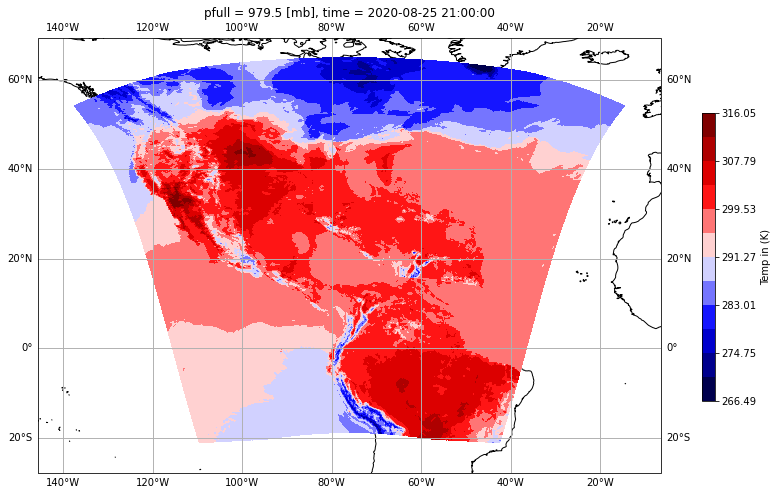

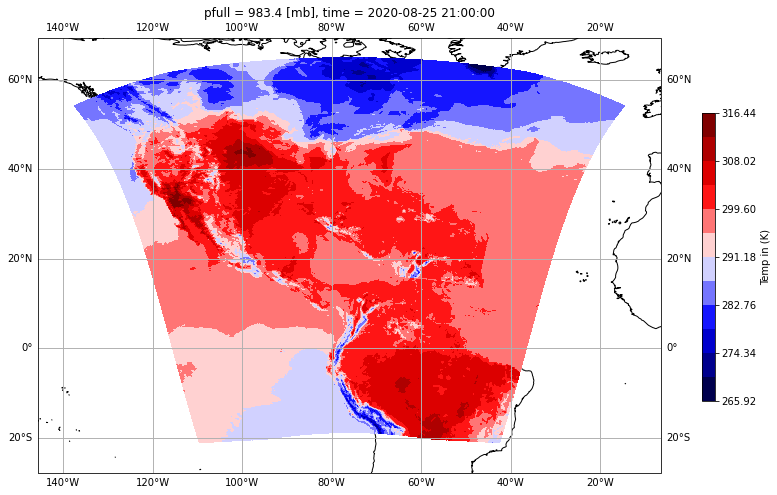

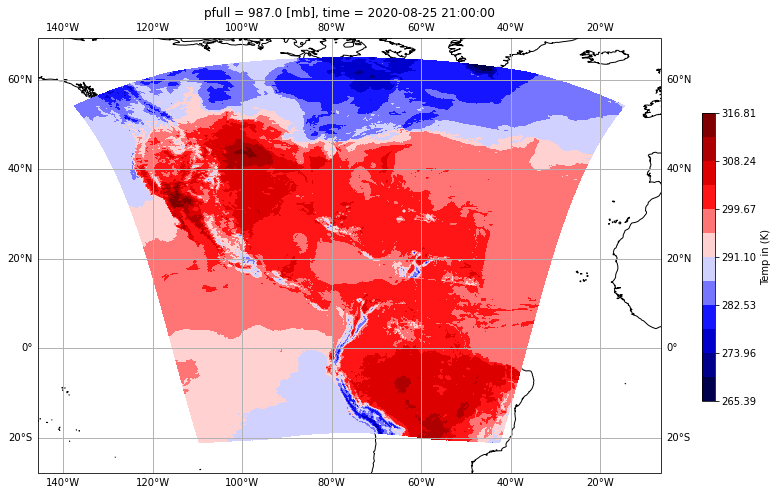

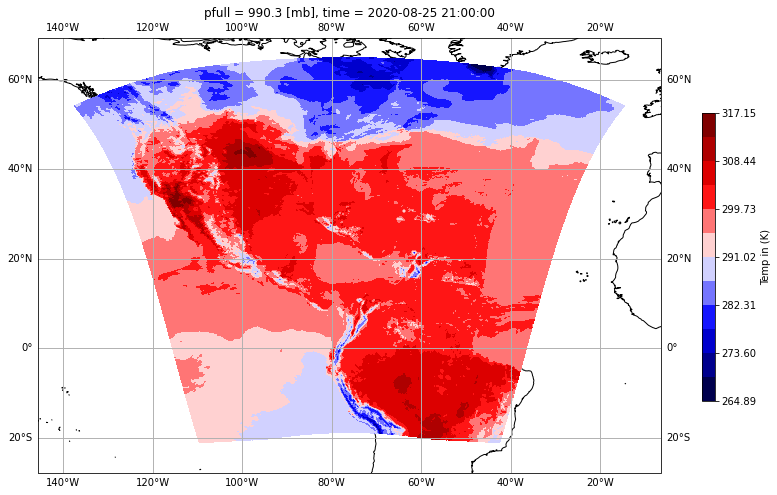

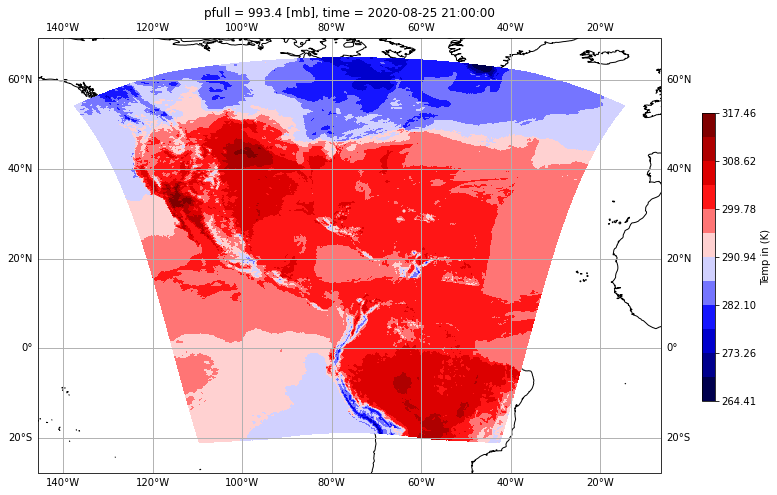

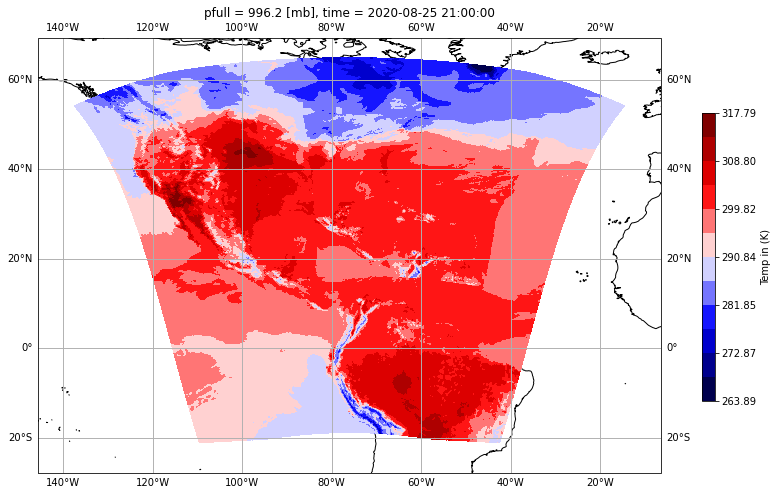

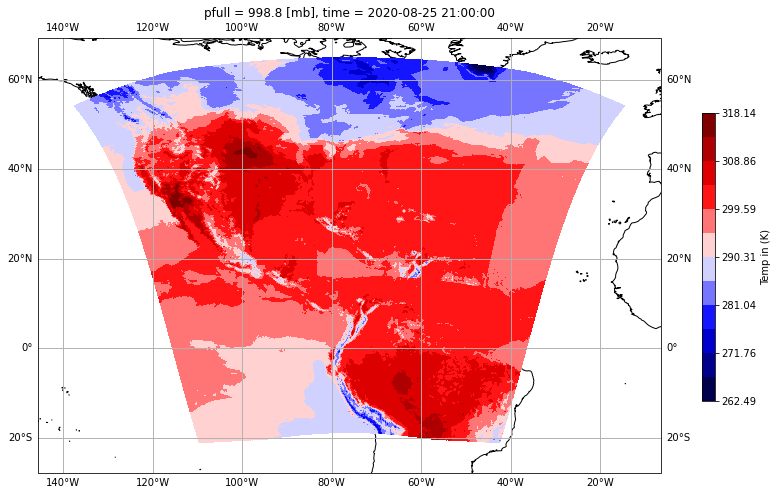

In [69]:
for i in range(len(pl.values.tolist())):
    plev=int(pl.values.tolist()[i])
    tmp=ds_atm['tmp'][0,i, :, :]
    lon=ds_atm.lon
    lat=ds_atm.lat
    tmp = tmp.assign_coords({'lat': lat, 'lon': lon})
    tmin=np.min(tmp)
    tmax=np.max(tmp)
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    #ax.add_feature(land_50m)
    ax.gridlines(draw_labels=False)
    p1 = tmp.plot(ax=ax,
              x='lon', y='lat',
              levels=13, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)
    #plt.title('Temperature@plev'+'_'+str(i)+'_'+int(str(pl.values.tolist()[i]))+"mb")
    ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
    cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
    cb.ax.set_ylabel('Temp in (K)')
    ax.gridlines(draw_labels=True)
 
    plt.savefig('temprature@2m_prtn_dom@plev'+str(plev)+'.png')
    

#### Plotting 3D Varaibles using cartopy nest domain HAFS

In [70]:
ds_atm_nst,tmp_nst=loadData_assingCord_atm("atm.nest02.f009.nc",42,"tmp")

FileNotFoundError: [Errno 2] No such file or directory: b'C:\\Users\\bantwale.enyew\\python_netcdf\\atm.nest02.f009.nc'

In [ ]:
tmp=ds_atm_nst['tmp'][0,42, :, :]
lon=ds_atm_nst.lon
lat=ds_atm_nst.lat
tmp = tmp.assign_coords({'lat': lat, 'lon': lon})
tmp.coords

In [ ]:
pl=ds_atm_nst.pfull
pl

In [ ]:
for i in range(len(pl.values.tolist())):
    print(i,pl.values.tolist()[i])

In [ ]:
tmin=np.min(tmp_nst)
tmax=np.max(tmp_nst)
tmin,tmax

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
ax.gridlines(draw_labels=False)

p1 = tmp.plot(ax=ax,
              x='lon', y='lat',
              levels=13, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

plt.title('Temperature at 2m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('SST (°C)')

In [ ]:
max(lon) 

In [ ]:
for i in range(len(pl.values.tolist())):
    tmp=ds_atm_nst['tmp'][0,i, :, :]
    plev=int(pl.values.tolist()[i])
    lon=ds_atm_nst.lon
    lat=ds_atm_nst.lat
    tmp = tmp.assign_coords({'lat': lat, 'lon': lon})
    tmin=np.min(tmp)
    tmax=np.max(tmp)
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    #ax.add_feature(land_50m)
    ax.gridlines(draw_labels=False)
    p1 = tmp.plot(ax=ax,
              x='lon', y='lat',
              levels=13, vmin=tmin, vmax=tmax,
              cmap='seismic',
              transform=ccrs.PlateCarree(),
              add_colorbar=False)
    #plt.title('Temperature at plev'+str(i)+str(pl.values.tolist()[i]))
    ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
    cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
    cb.ax.set_ylabel('Temp at 2m (K)')
    ax.gridlines(draw_labels=True)
    plt.savefig('temprature@2m_nest_dom@plev'+str(plev)+'.png')
 

In [ ]:
np.min(lon)-np.max(lon)

In [ ]:
fig = plt.figure(figsize=(12, 12))
pc = ccrs.PlateCarree()
ax = fig.add_subplot(projection=pc, extent=(-140, -20, -25, 65))

ax.set_global()
ax.coastlines(resolution='50m', # alternative: '110m', '50m', '10m' 
              color='grey')
ax.gridlines(draw_labels=True) 

x = lon.data
y = lat.data
c = RFnet.data
norm=mcolors.Normalize(vmin=tmin, vmax=tmax)
cmap = "seismic"

ax.set_extent(extents=(-20, 20, 32, 52)) # x0, x1, y0, y1 in degrees

im = ax.scatter(x, y, c=c, cmap=cmap, norm=norm, s=2)

cbar = fig.colorbar(im, location='bottom', shrink=1, pad=0.05, ax=ax)
cbar.set_label('RFnet')

plt.show()